In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


import plotly.express as px

from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from scipy.stats import f
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm


from statsmodels.stats.diagnostic import linear_reset
from scipy import stats


from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro



In [2]:
data = pd.read_csv('housingfile.csv')

**Exploratory Data Analysis**

In [3]:
print(data.shape)

(2413, 18)


In [4]:
data.head(5)

Lot_Frontage  Lot_Area Bldg_Type House_Style   Overall_Cond  Year_Built  \
0           141     31770    OneFam   One_Story        Average        1960   
1            80     11622    OneFam   One_Story  Above_Average        1961   
2            81     14267    OneFam   One_Story  Above_Average        1958   
3            93     11160    OneFam   One_Story        Average        1968   
4            74     13830    OneFam   Two_Story        Average        1997   

  Exter_Cond  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  Full_Bath  \
0    Typical           1080          1656              0          1   
1    Typical            882           896              0          1   
2    Typical           1329          1329              0          1   
3    Typical           2110          2110              0          2   
4    Typical            928           928            701          2   

   Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  Fireplaces  Longitude   Latitude  \
0          0              3              1           2 -93.619754  42.054035   
1          0              2              1           0 -93.619756  42.053014   
2          1              3              1           0 -93.619387  42.052659   
3          1              3              1           2 -93.617320  42.051245   
4          1              3              1           1 -93.638933  42.060899   

   Sale_Price  
0      215000  
1      105000  
2      172000  
3      244000  
4      189900

Descriptive statistics

In [5]:
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       Lot_Frontage       Lot_Area   Year_Built  Total_Bsmt_SF  First_Flr_SF  \
count   2413.000000    2413.000000  2413.000000    2413.000000   2413.000000   
mean      55.462495   10060.208040  1969.436386    1022.827600   1133.857024   
std       33.542416    8222.759854    29.487943     408.977848    366.442470   
min        0.000000    1300.000000  1872.000000       0.000000    334.000000   
25%       37.000000    7390.000000  1953.000000     784.000000    866.000000   
50%       60.000000    9360.000000  1971.000000     970.000000   1060.000000   
75%       77.000000   11404.000000  1998.000000    1246.000000   1350.000000   
max      313.000000  215245.000000  2010.000000    3206.000000   3820.000000   

       Second_Flr_SF    Full_Bath    Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
count    2413.000000  2413.000000  2413.000000    2413.000000    2413.000000   
mean      339.242851     1.539163     0.377953       2.854538       1.040199   
std       423.1

Scatter plot for each variable against Sale Price

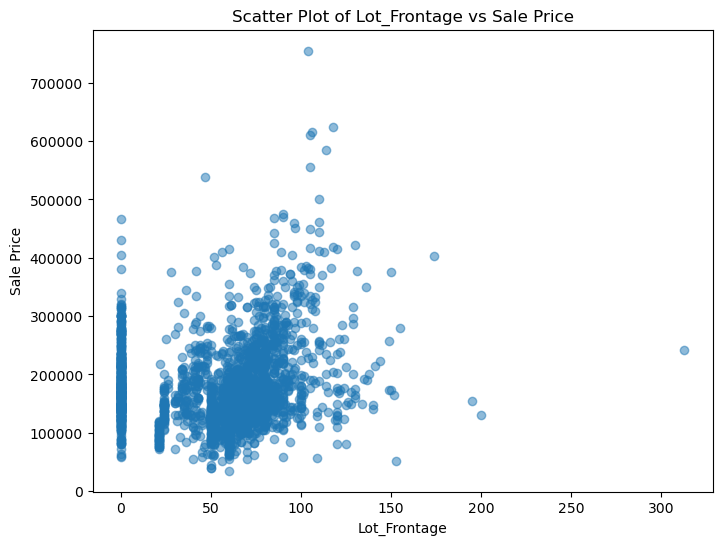

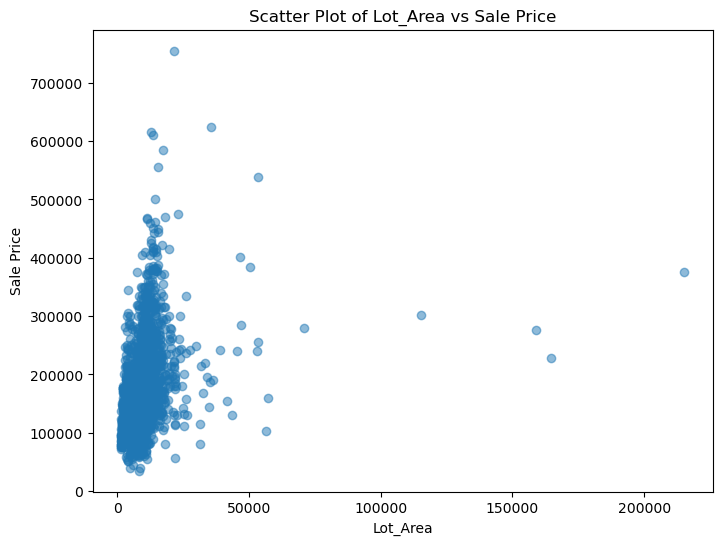

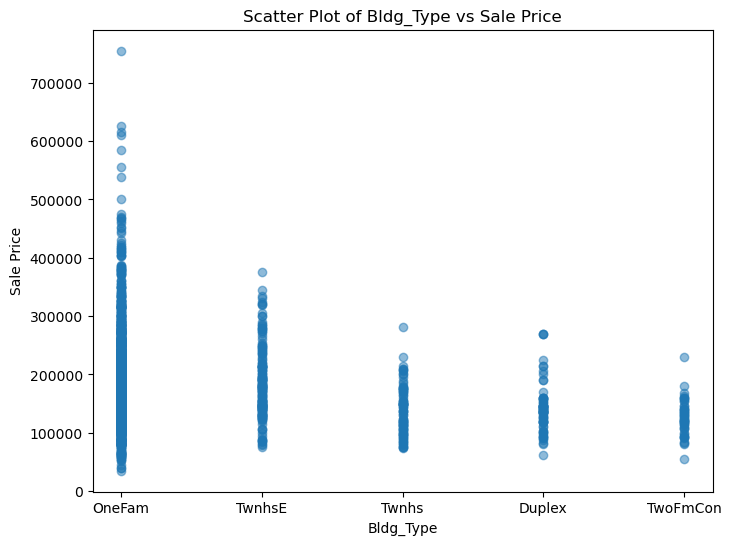

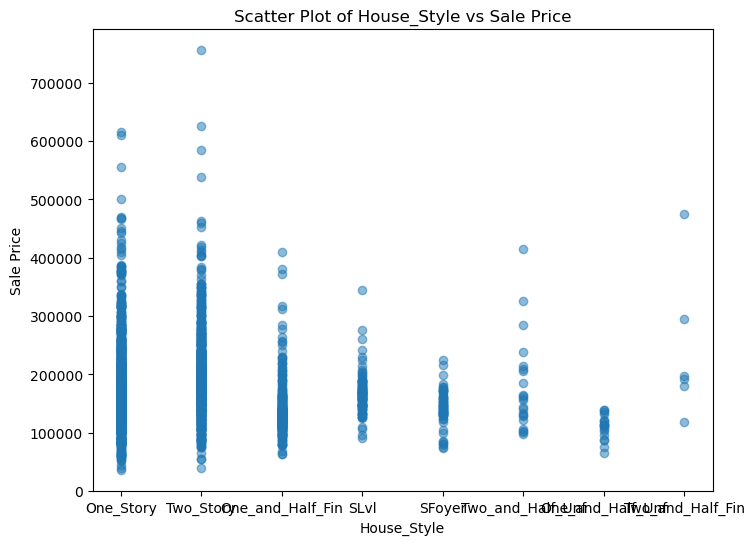

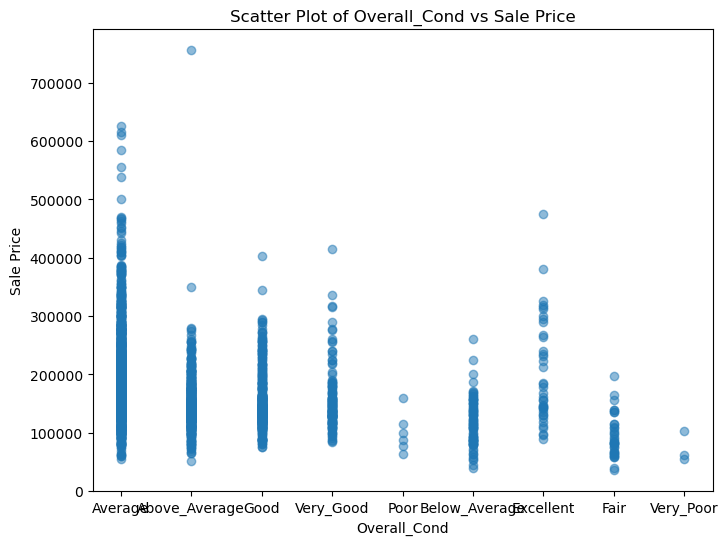

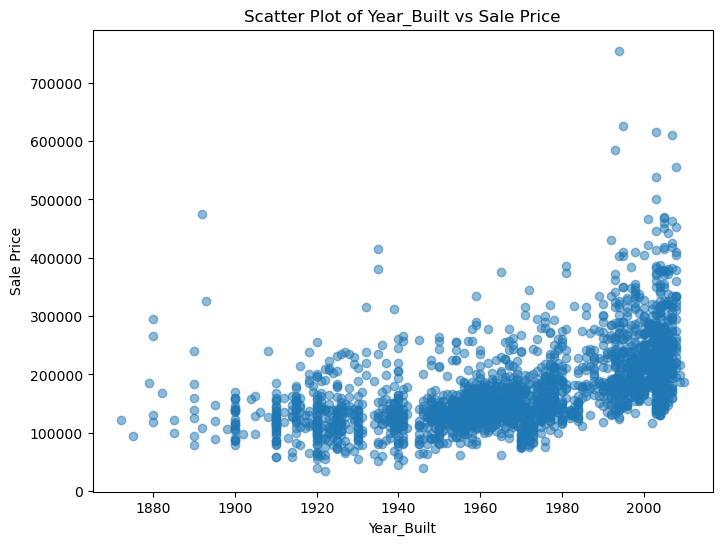

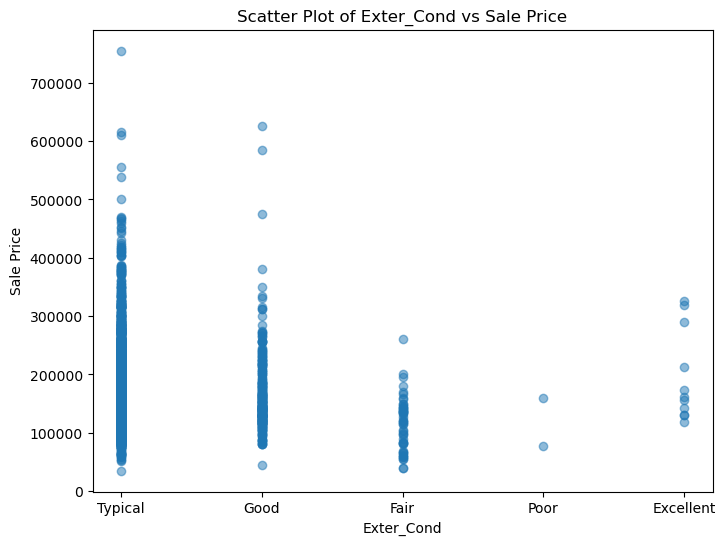

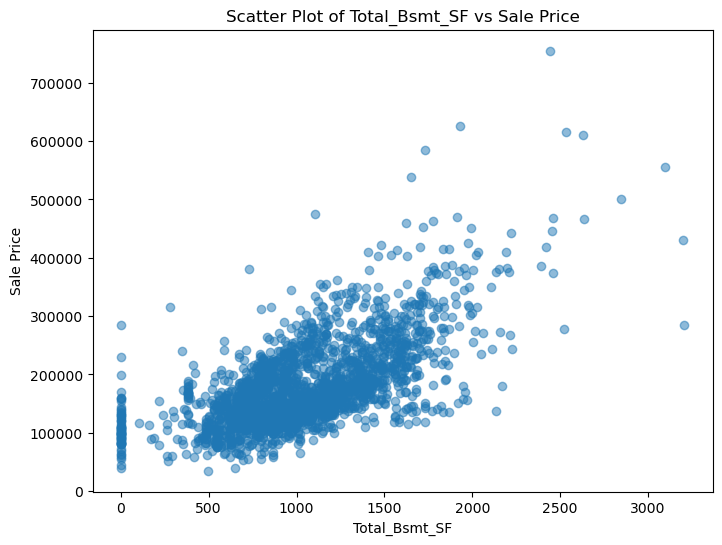

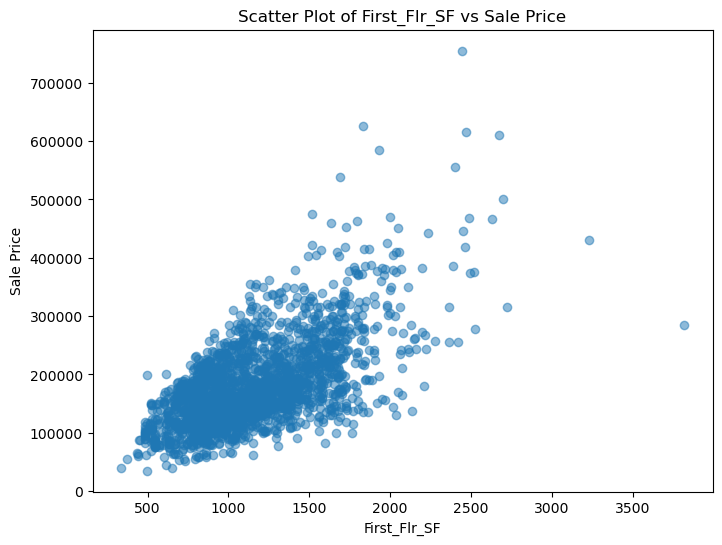

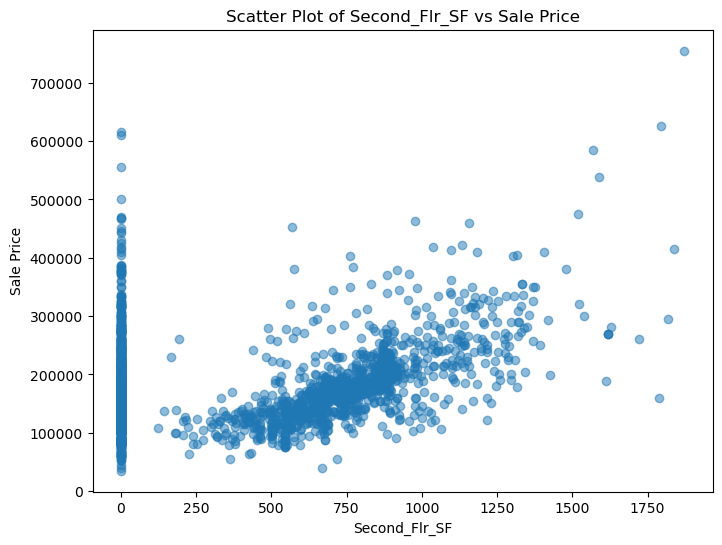

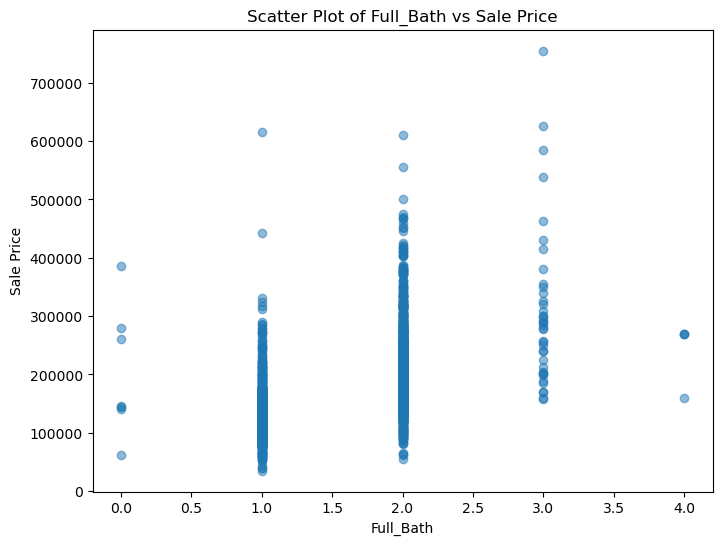

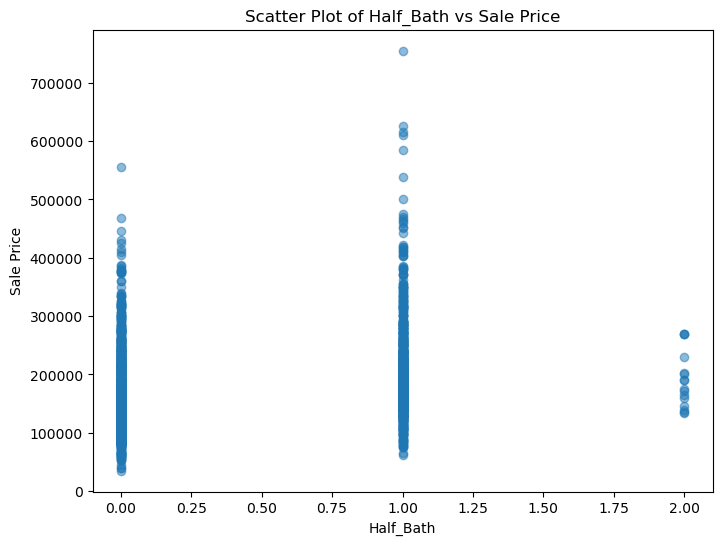

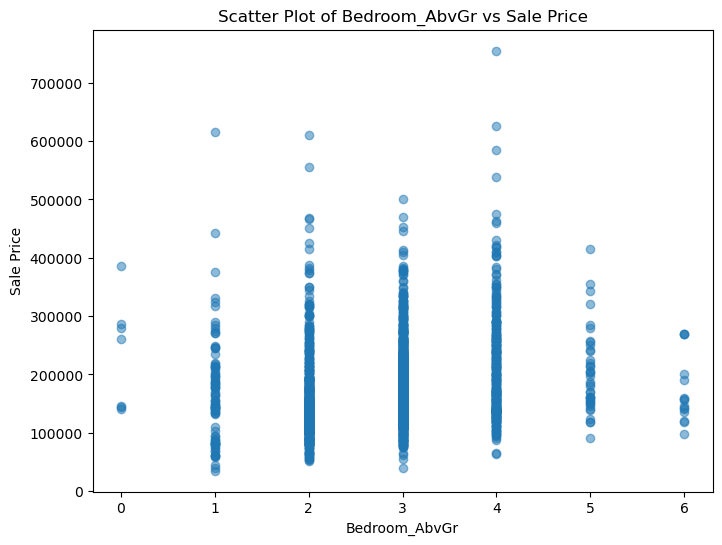

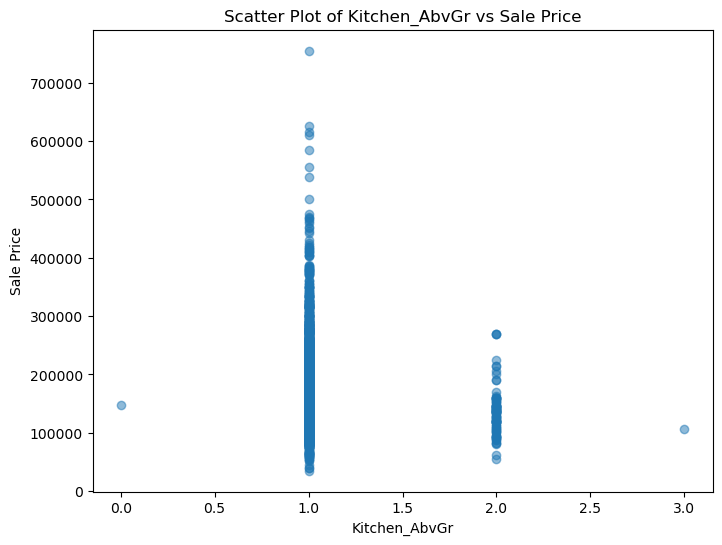

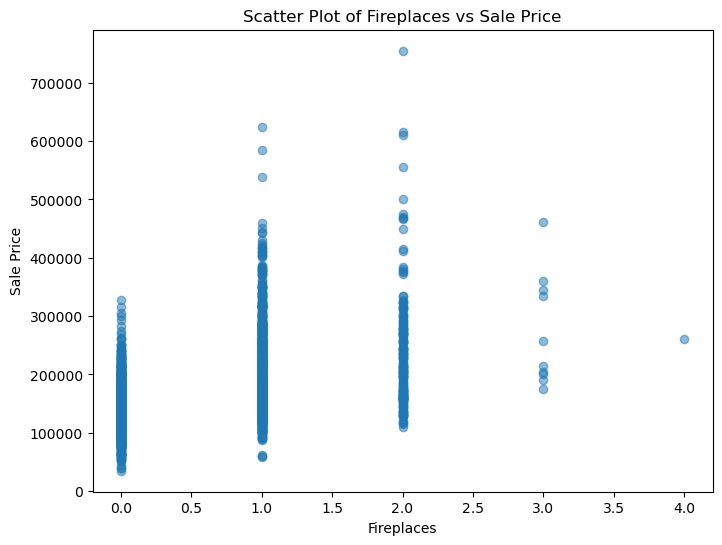

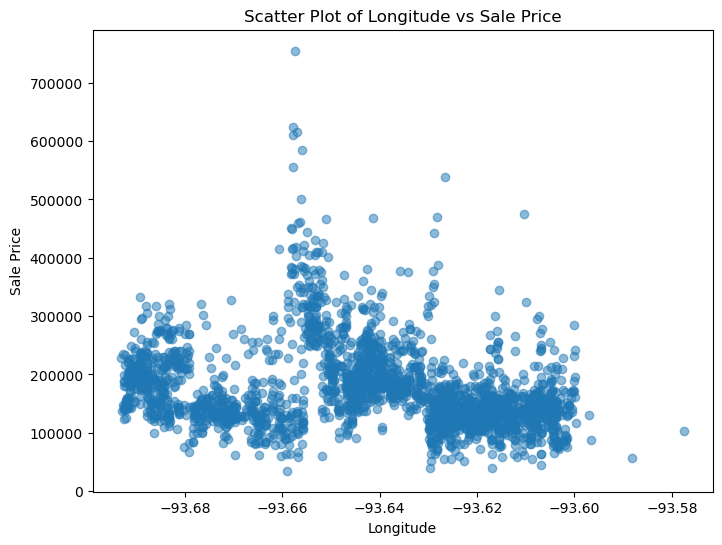

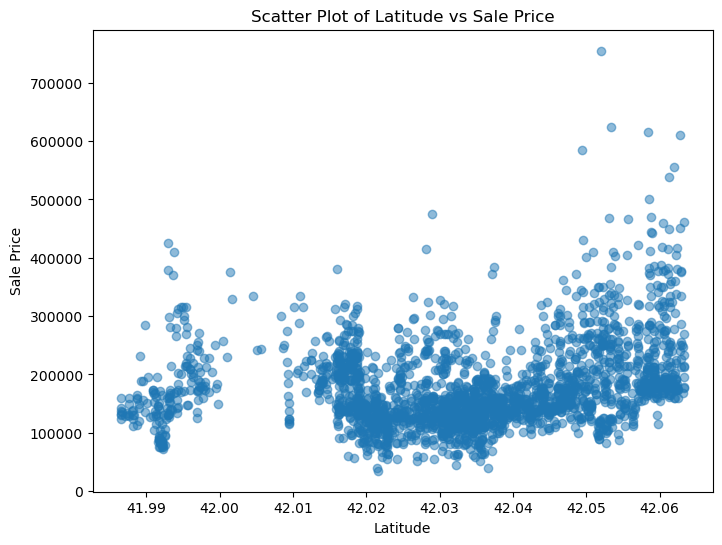

In [6]:
variables = data.columns[data.columns != 'Sale_Price']


for variable in variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[variable], data['Sale_Price'], alpha=0.5)
    plt.title(f'Scatter Plot of {variable} vs Sale Price')
    plt.xlabel(variable)
    plt.ylabel('Sale Price')
    plt.show()

In [7]:


fig = px.box(data, x="Year_Built", y="Sale_Price", title='Sale Price vs Year_Built',
             height=600)
fig.show()

Pie Plot for categorical variables

In [8]:
#Distribution of Overall condition of the house
fig = px.pie(data, names = "Overall_Cond", title = "Overall condition of the house", color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


In [9]:

fig = px.scatter(data, 
                 x='Longitude', 
                 y='Latitude', 
                 color='Sale_Price',
                 size='Sale_Price',
                 hover_name='Sale_Price', 
                 title='Housing Prices Scatter Plot')

fig.show()

C:\Users\BAJWA\AppData\Local\Temp\ipykernel_10412\3084167552.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




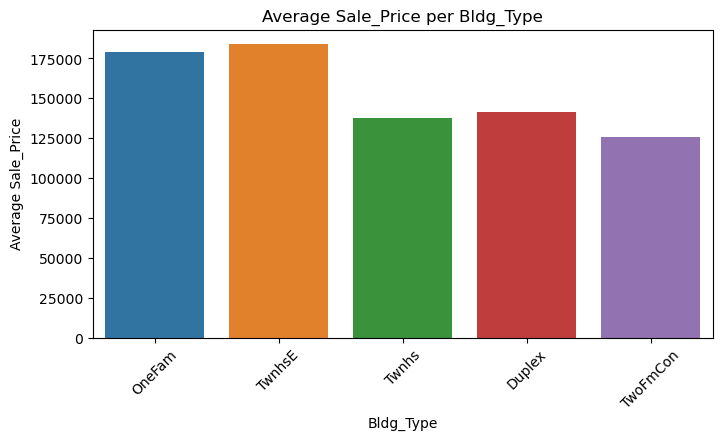

C:\Users\BAJWA\AppData\Local\Temp\ipykernel_10412\3084167552.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




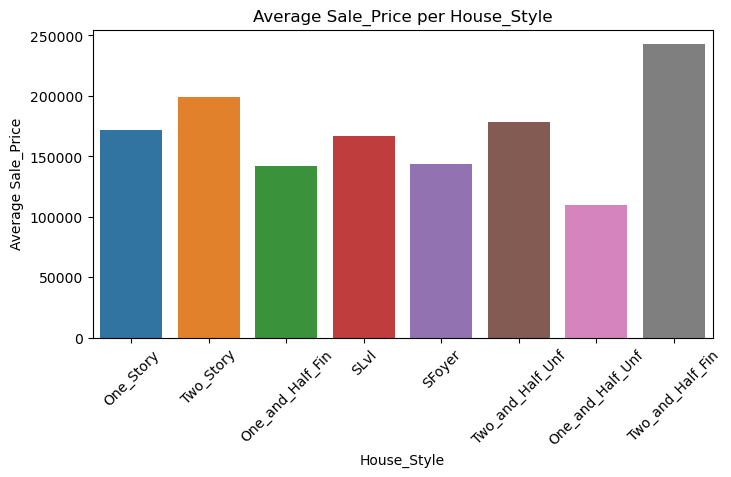

C:\Users\BAJWA\AppData\Local\Temp\ipykernel_10412\3084167552.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




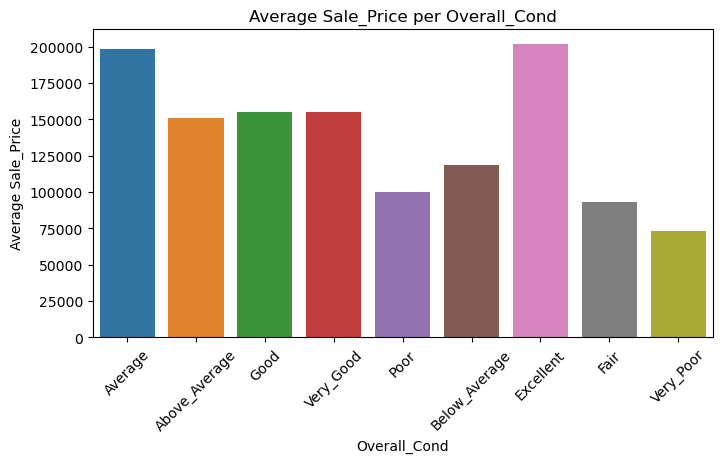

C:\Users\BAJWA\AppData\Local\Temp\ipykernel_10412\3084167552.py:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




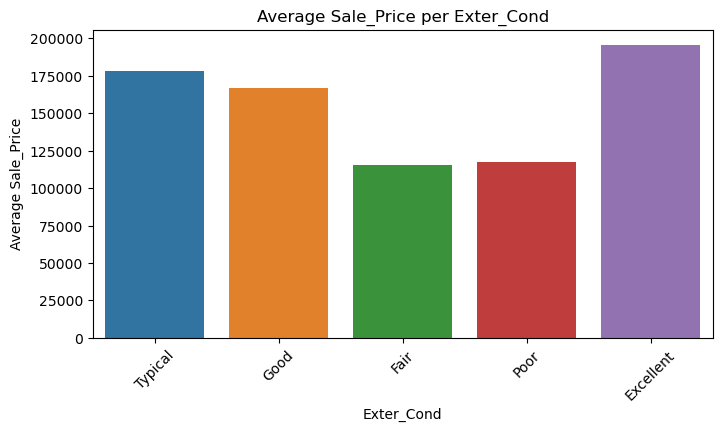

In [10]:
# Plotting average Sale_Price per category for each categorical variable

categorical_v = ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

for var in categorical_v:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=var, y='Sale_Price', data = data, ci=None)
    plt.title(f'Average Sale_Price per {var}')
    plt.xticks(rotation=45) 
    plt.xlabel(var)
    plt.ylabel('Average Sale_Price')
    plt.show()

Levels of measurement

In [11]:
Arr_measurment = {}
for col in data.columns:
    data_type = data[col].dtype
    unique_values = data[col].nunique()

    if data_type == 'object':
        level = 'Nominal' if unique_values <= 10 else 'Ordinal'
    elif data_type in ['int64', 'float64']:
        if data[col].nunique() > 10:
            level = 'Interval or Ratio'
        else:
            level = 'Ordinal' if unique_values <= 10 else 'Nominal'
    else:
        level = 'Unknown'

    Arr_measurment[col] = level

print("\nLevels of Measurement:")
for col, level in Arr_measurment.items():
    print(f"{col}: {level}")



Levels of Measurement:
Lot_Frontage: Interval or Ratio
Lot_Area: Interval or Ratio
Bldg_Type: Nominal
House_Style: Nominal
Overall_Cond: Nominal
Year_Built: Interval or Ratio
Exter_Cond: Nominal
Total_Bsmt_SF: Interval or Ratio
First_Flr_SF: Interval or Ratio
Second_Flr_SF: Interval or Ratio
Full_Bath: Ordinal
Half_Bath: Ordinal
Bedroom_AbvGr: Ordinal
Kitchen_AbvGr: Ordinal
Fireplaces: Ordinal
Longitude: Interval or Ratio
Latitude: Interval or Ratio
Sale_Price: Interval or Ratio


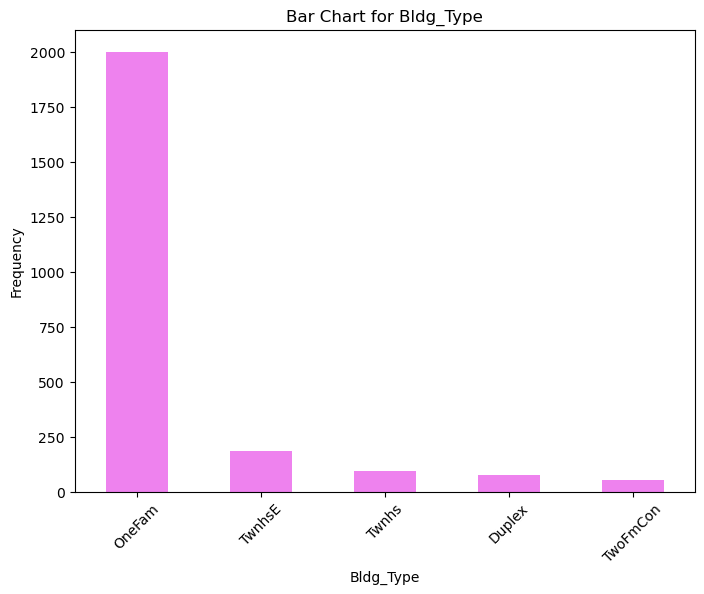


Column: Bldg_Type
Frequency Distribution:
OneFam      2002
TwnhsE       188
Twnhs         93
Duplex        78
TwoFmCon      52
Name: Bldg_Type, dtype: int64
Mode:  OneFam


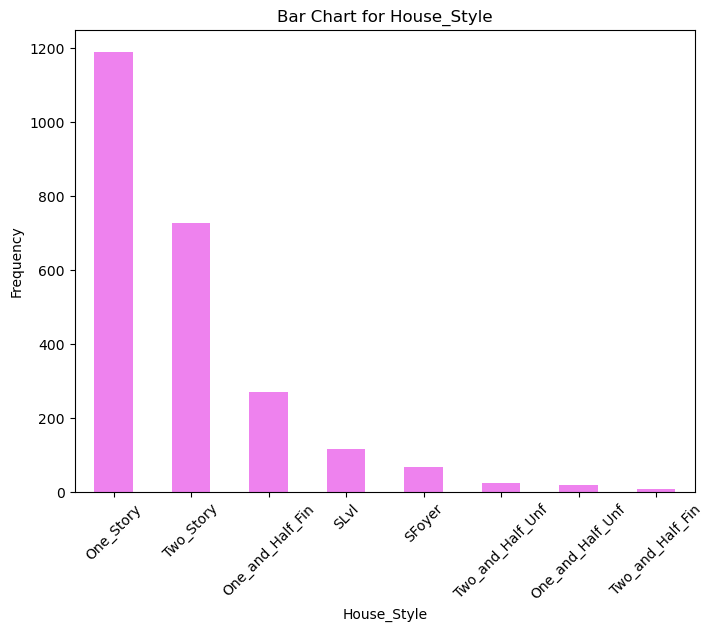


Column: House_Style
Frequency Distribution:
One_Story           1189
Two_Story            726
One_and_Half_Fin     270
SLvl                 115
SFoyer                66
Two_and_Half_Unf      22
One_and_Half_Unf      19
Two_and_Half_Fin       6
Name: House_Style, dtype: int64
Mode:  One_Story


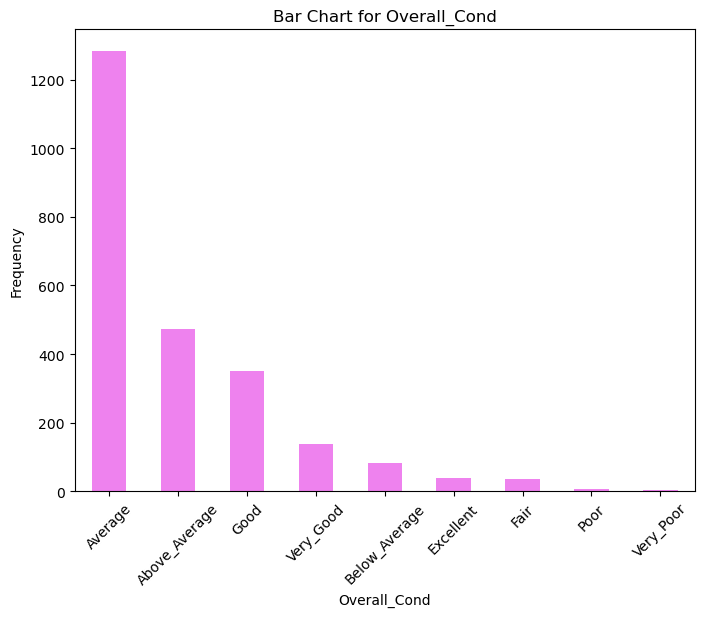


Column: Overall_Cond
Frequency Distribution:
Average          1282
Above_Average     474
Good              352
Very_Good         139
Below_Average      82
Excellent          39
Fair               36
Poor                6
Very_Poor           3
Name: Overall_Cond, dtype: int64
Mode:  Average


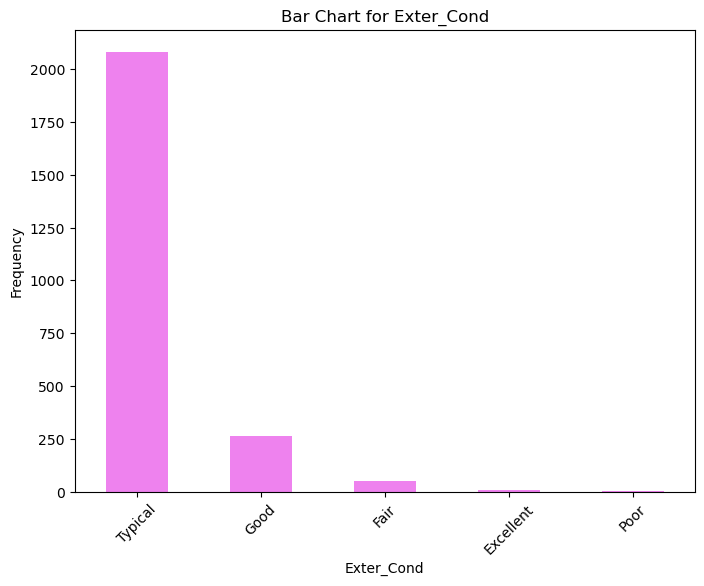


Column: Exter_Cond
Frequency Distribution:
Typical      2081
Good          266
Fair           53
Excellent      11
Poor            2
Name: Exter_Cond, dtype: int64
Mode:  Typical


In [12]:
#Visualizing Nominal features
#'nominal_features' is a list of column names with nominal data

nominal_features = ['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond']

# Looping through the nominal columns and creating bar charts
for col in nominal_features:
    value_counts = data[col].value_counts()
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color='violet')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
    print(f"\nColumn: {col}")
    frequency_dist = data[col].value_counts()
    print("Frequency Distribution:") 
    print(frequency_dist)
    
    mode_val = data[col].mode().iloc[0]  # to Compute mode
    print("Mode: ", mode_val)


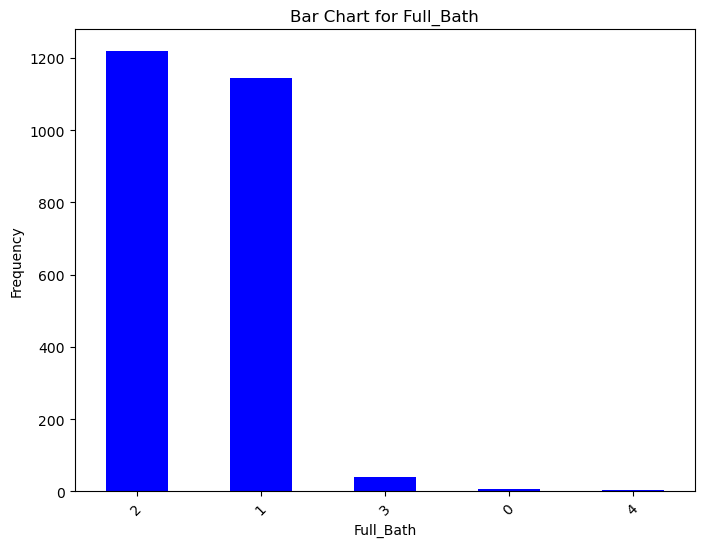


Column: Full_Bath
Frequency Distribution:
2    1218
1    1145
3      39
0       7
4       4
Name: Full_Bath, dtype: int64
Mode: 2
Median: 2.0
Range: 4


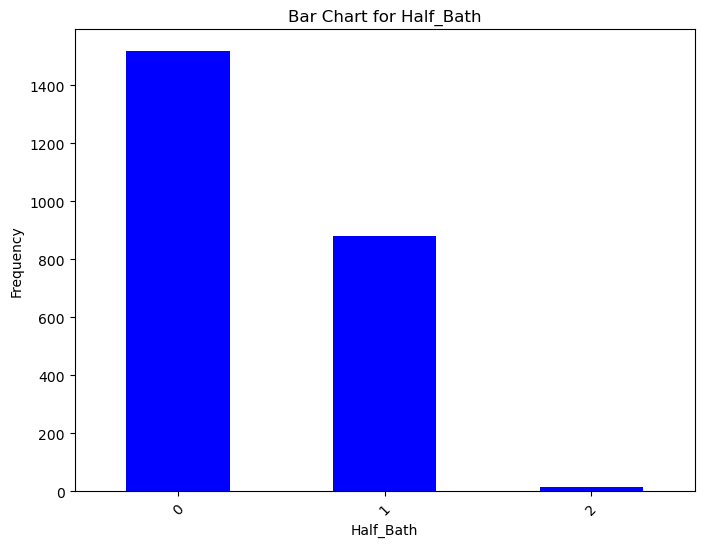


Column: Half_Bath
Frequency Distribution:
0    1517
1     880
2      16
Name: Half_Bath, dtype: int64
Mode: 0
Median: 0.0
Range: 2


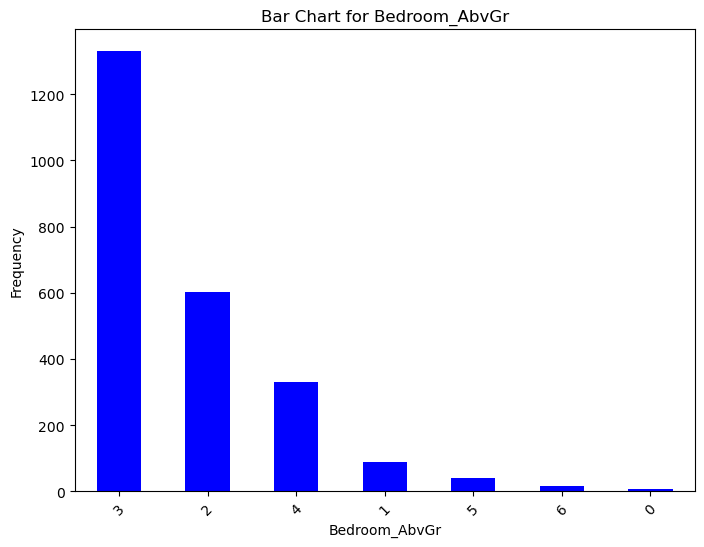


Column: Bedroom_AbvGr
Frequency Distribution:
3    1329
2     603
4     330
1      90
5      39
6      15
0       7
Name: Bedroom_AbvGr, dtype: int64
Mode: 3
Median: 3.0
Range: 6


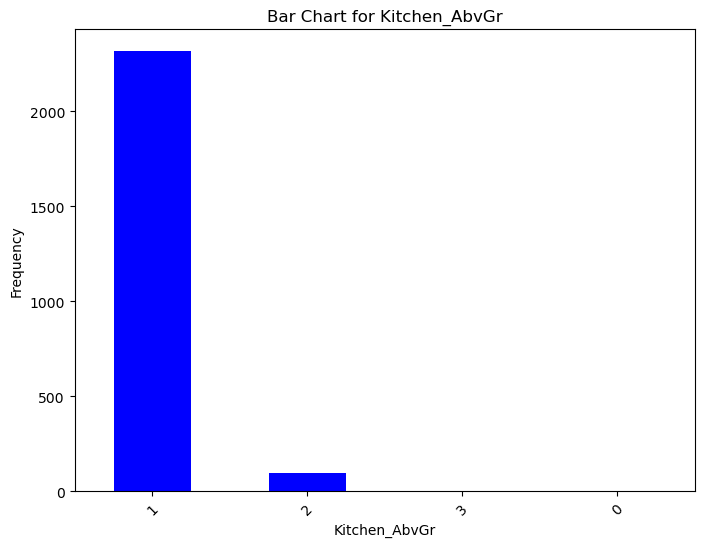


Column: Kitchen_AbvGr
Frequency Distribution:
1    2315
2      96
3       1
0       1
Name: Kitchen_AbvGr, dtype: int64
Mode: 1
Median: 1.0
Range: 3


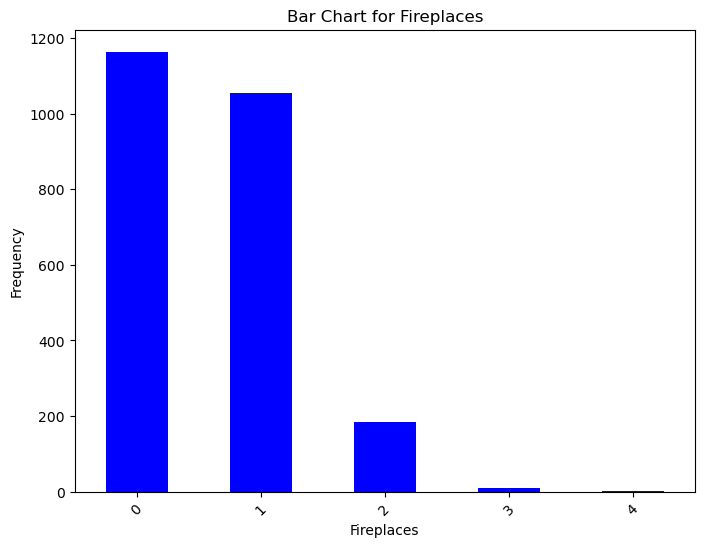


Column: Fireplaces
Frequency Distribution:
0    1164
1    1055
2     183
3      10
4       1
Name: Fireplaces, dtype: int64
Mode: 0
Median: 1.0
Range: 4


In [13]:
#Visualizing Ordinal features
ordinal_features = ['Full_Bath', 'Half_Bath','Bedroom_AbvGr','Kitchen_AbvGr','Fireplaces']

# looping through nominal columns and creating bar charts
for col in ordinal_features:
    value_counts = data[col].value_counts()
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color='blue')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  
    plt.show()
    print(f"\nColumn: {col}")
    frequency_dist = data[col].value_counts()
    print("Frequency Distribution:")
    print(frequency_dist)
    
    mode_val = data[col].mode().iloc[0]  # to Compute mode
    print(f"Mode: {mode_val}")
    
    median_val = data[col].median()  # to Compute median
    print(f"Median: {median_val}")
    
    col_range = data[col].max() - data[col].min() # to compute range
    print(f"Range: {col_range}")

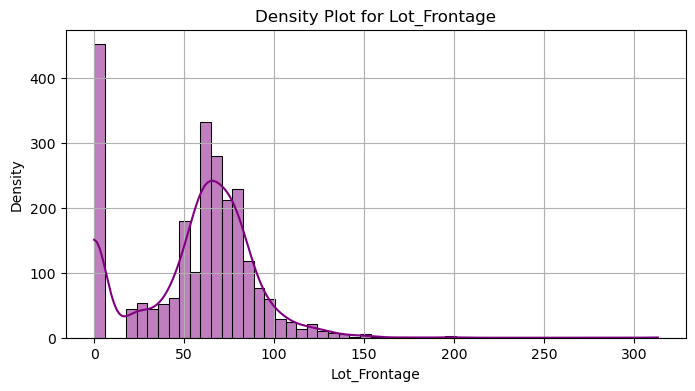

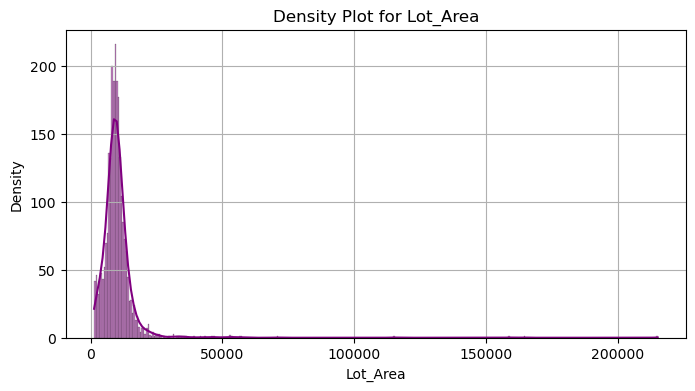

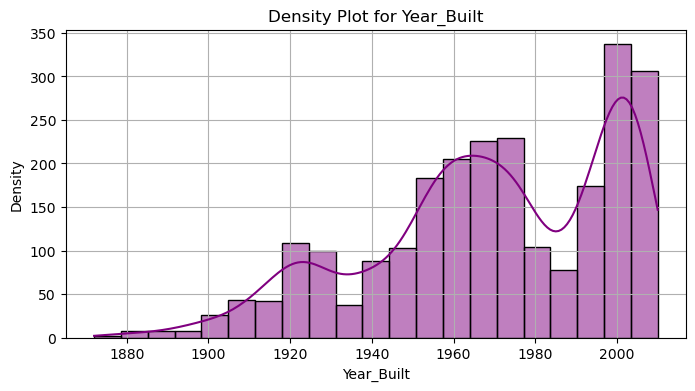

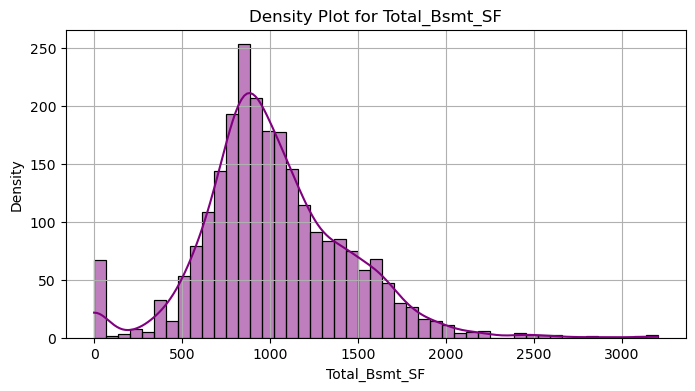

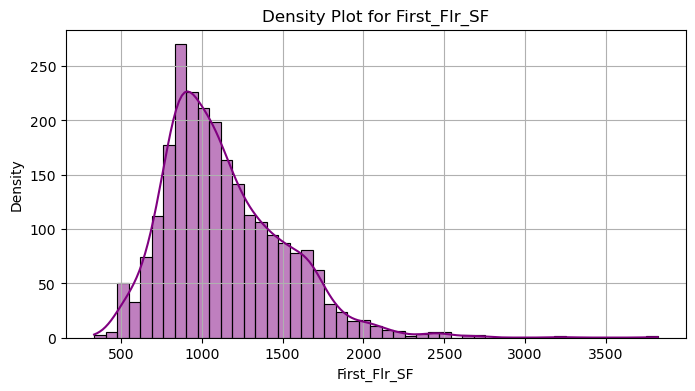

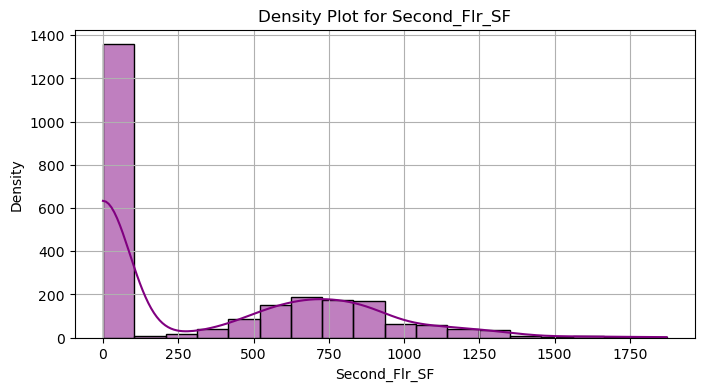

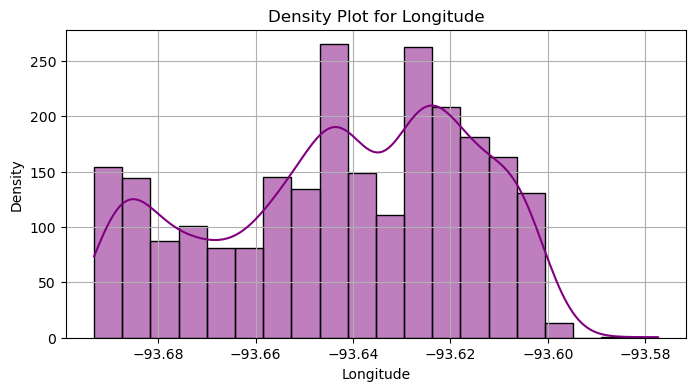

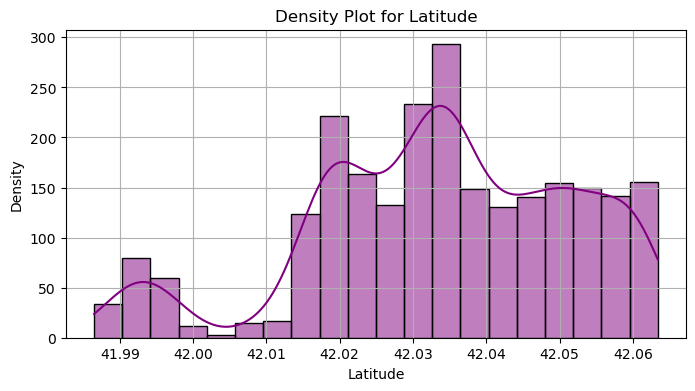

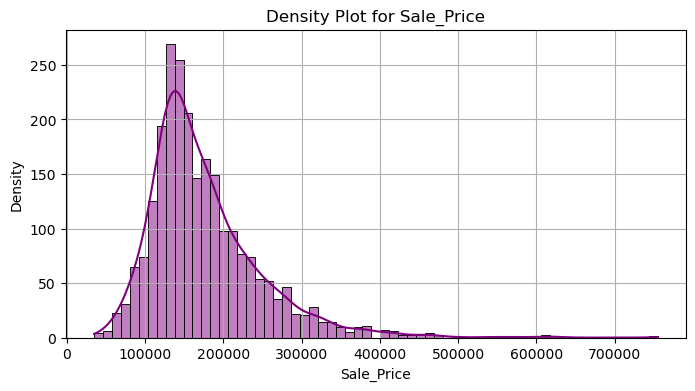

In [14]:
# List of interval and Ratio columns
interval_columns = ['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF', 'First_Flr_SF','Second_Flr_SF','Longitude', 'Latitude', 'Sale_Price']  

# Plotting interval columns as line plots
for col in interval_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='purple')
    plt.title(f"Density Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

**Preparation of Data**

Displaying categorical and numeric variables in dataset

In [15]:
categorical_vars = data.select_dtypes(include=['object']).columns
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns

# Display the lists of categorical and numeric variables
print("Categorical Variables:")
print(categorical_vars)

print("\nNumeric Variables:")
print(numeric_vars)

Categorical Variables:
Index(['Bldg_Type', 'House_Style', 'Overall_Cond', 'Exter_Cond'], dtype='object')

Numeric Variables:
Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Total_Bsmt_SF',
       'First_Flr_SF', 'Second_Flr_SF', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Fireplaces', 'Longitude', 'Latitude',
       'Sale_Price'],
      dtype='object')


Applying Label encoding for categorical variables

In [16]:
columns_to_encode = ['Overall_Cond', 'Bldg_Type', 'Exter_Cond', 'House_Style']

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Loop through the columns and apply label encoding
for col in columns_to_encode:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

In [17]:
#dropping the categorical columns as its been encoded
data = data.drop(columns = columns_to_encode)

In [18]:
data.head()
print(data.dtypes)

Lot_Frontage              int64
Lot_Area                  int64
Year_Built                int64
Total_Bsmt_SF             int64
First_Flr_SF              int64
Second_Flr_SF             int64
Full_Bath                 int64
Half_Bath                 int64
Bedroom_AbvGr             int64
Kitchen_AbvGr             int64
Fireplaces                int64
Longitude               float64
Latitude                float64
Sale_Price                int64
Overall_Cond_encoded      int32
Bldg_Type_encoded         int32
Exter_Cond_encoded        int32
House_Style_encoded       int32
dtype: object


Checking Null values

In [19]:
null_counts = data.isnull().sum()

# Display the count of null values for each variable
print("Count of Null Values for Each Variable:")
print(null_counts)

Count of Null Values for Each Variable:
Lot_Frontage            0
Lot_Area                0
Year_Built              0
Total_Bsmt_SF           0
First_Flr_SF            0
Second_Flr_SF           0
Full_Bath               0
Half_Bath               0
Bedroom_AbvGr           0
Kitchen_AbvGr           0
Fireplaces              0
Longitude               0
Latitude                0
Sale_Price              0
Overall_Cond_encoded    0
Bldg_Type_encoded       0
Exter_Cond_encoded      0
House_Style_encoded     0
dtype: int64


Checking skewness and kurtosis for each variable

In [20]:
skewness = data.skew()
kurtosis = data.kurt()

stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print(stats_df)

                       Skewness    Kurtosis
Lot_Frontage          -0.081114    1.165690
Lot_Area              13.393921  270.466068
Year_Built            -0.586724   -0.438653
Total_Bsmt_SF          0.456386    1.716119
First_Flr_SF           1.043301    2.256534
Second_Flr_SF          0.804118   -0.559404
Full_Bath              0.245013   -0.570307
Half_Bath              0.663992   -1.162667
Bedroom_AbvGr          0.184159    1.471746
Kitchen_AbvGr          4.681574   21.974672
Fireplaces             0.739075    0.138247
Longitude             -0.337513   -0.972557
Latitude              -0.507778   -0.083129
Sale_Price             1.745358    5.825764
Overall_Cond_encoded   1.309029    0.365022
Bldg_Type_encoded      2.216017    4.754053
Exter_Cond_encoded    -2.406885    4.640708
House_Style_encoded    0.498645   -1.568070


In [21]:
threshold = 1  # Defining an acceptable threshold

# Filtering columns based on the threshold for skewness
unacceptable_skew_columns = stats_df[(abs(stats_df['Skewness']) > threshold) |
                                     (abs(stats_df['Skewness']) < -threshold)].index.tolist()

print("Columns with unacceptable skewness:")
print(unacceptable_skew_columns)

Columns with unacceptable skewness:
['Lot_Area', 'First_Flr_SF', 'Kitchen_AbvGr', 'Sale_Price', 'Overall_Cond_encoded', 'Bldg_Type_encoded', 'Exter_Cond_encoded']


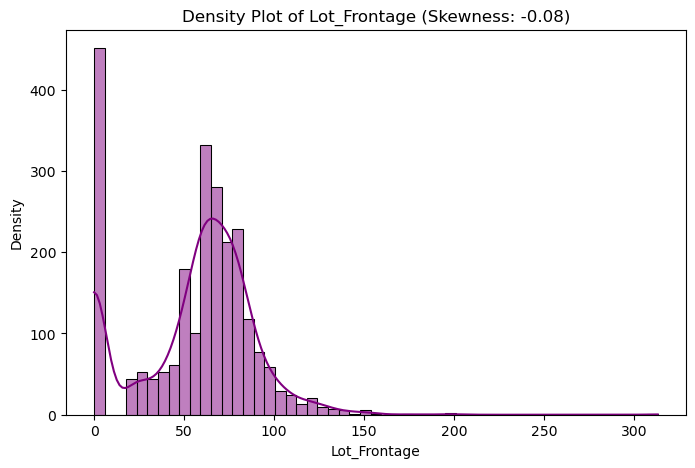

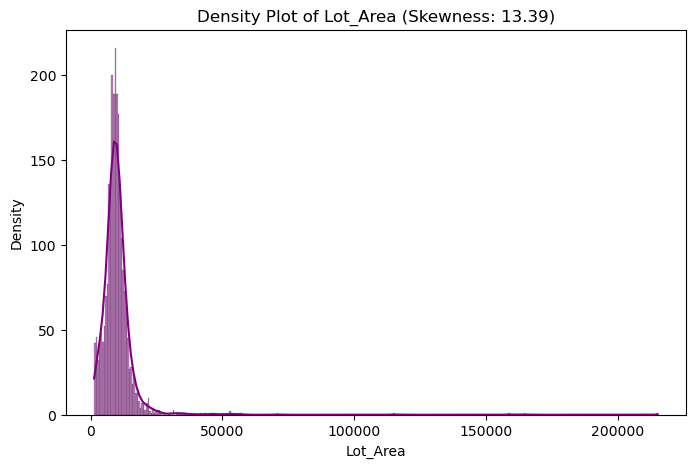

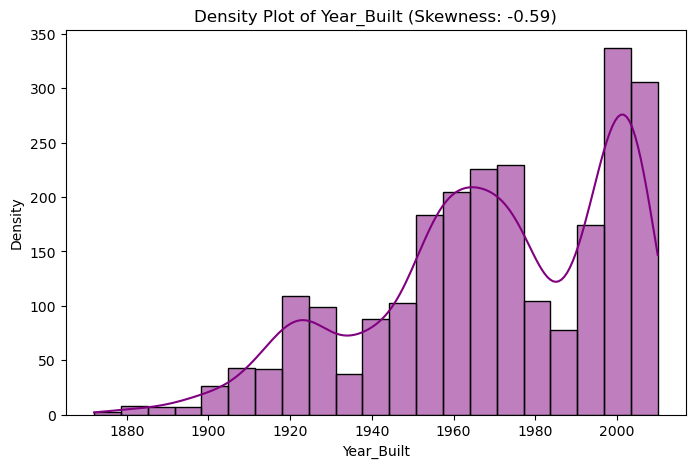

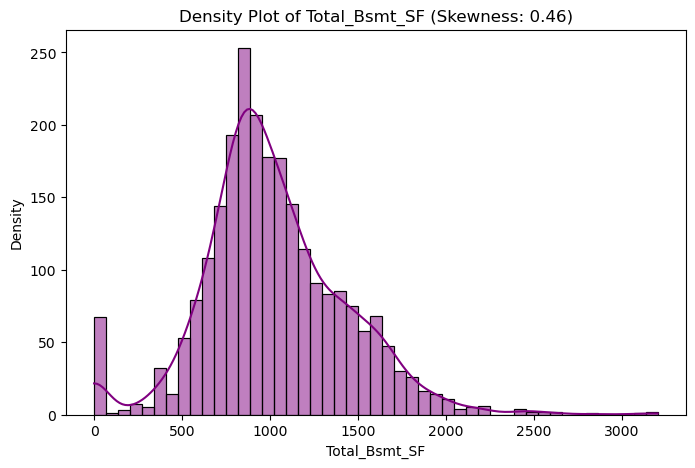

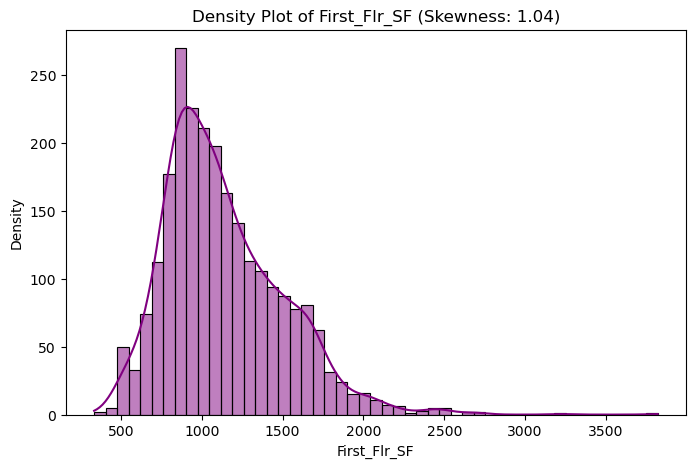

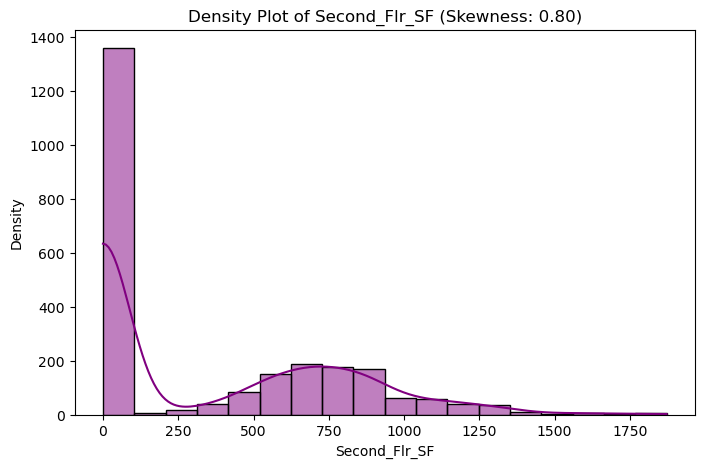

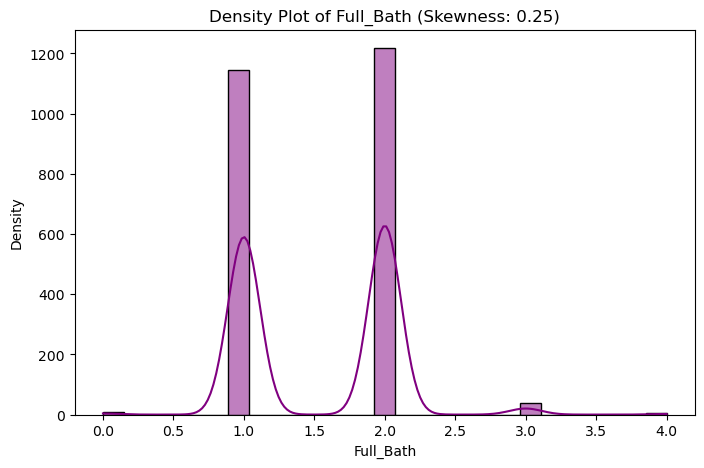

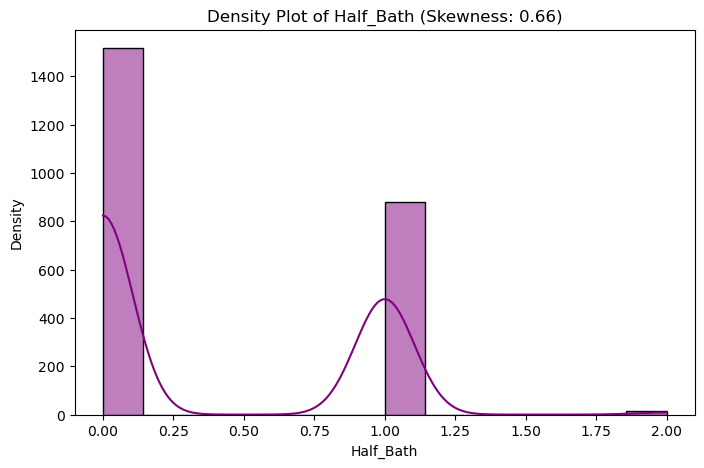

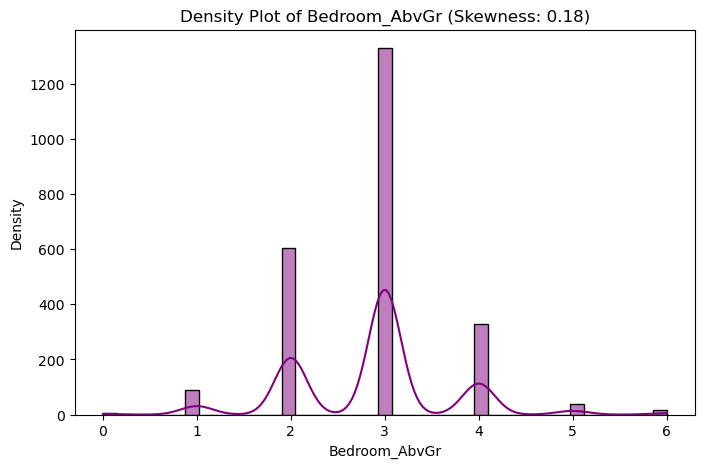

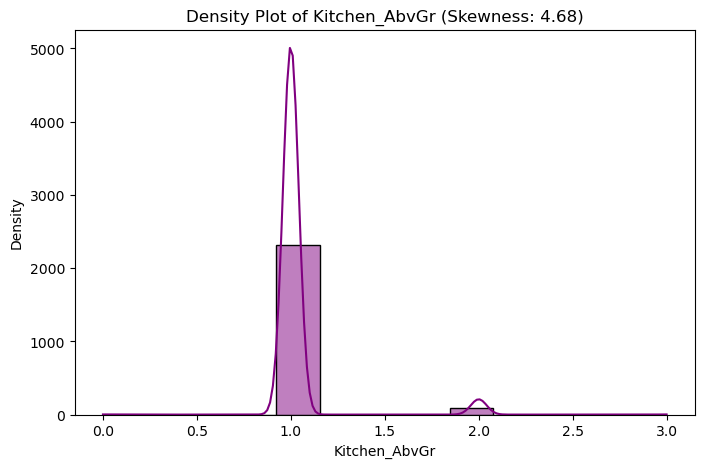

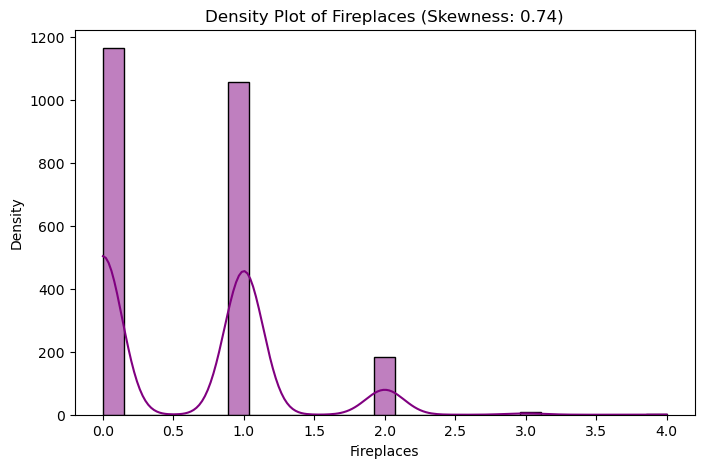

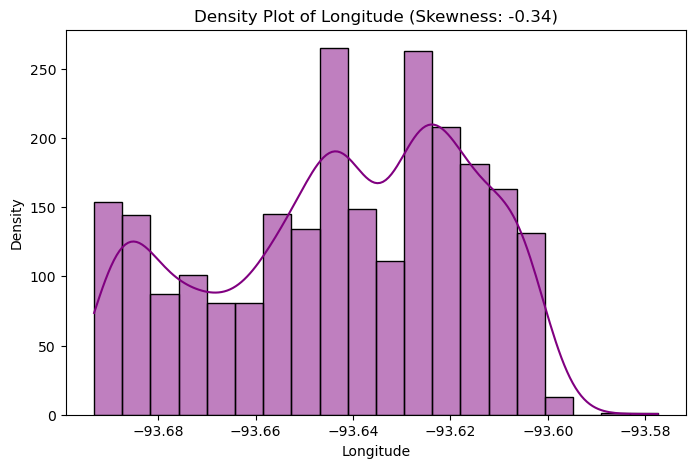

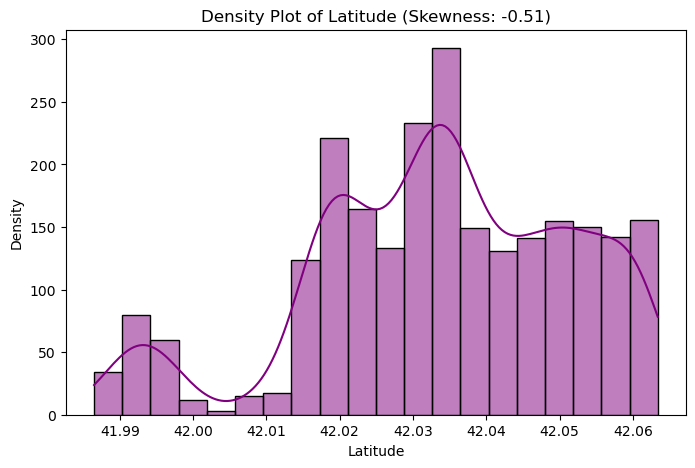

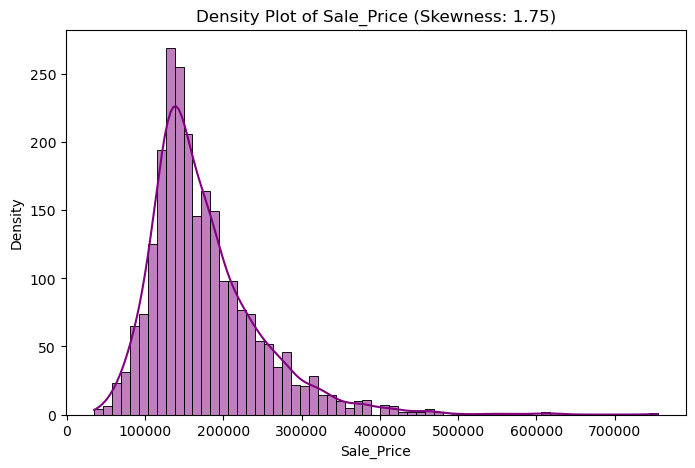

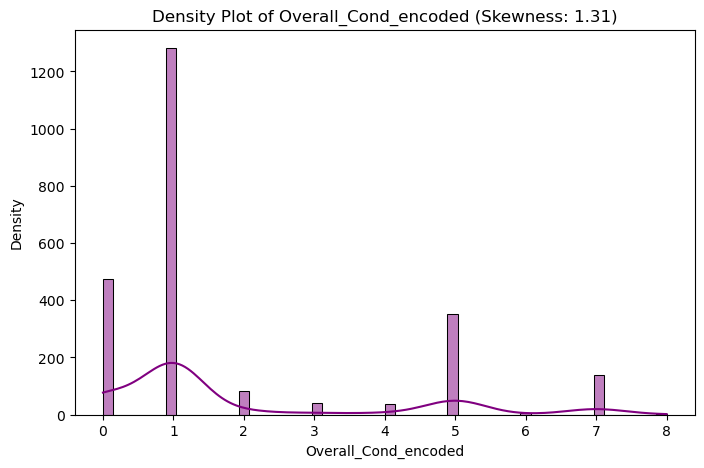

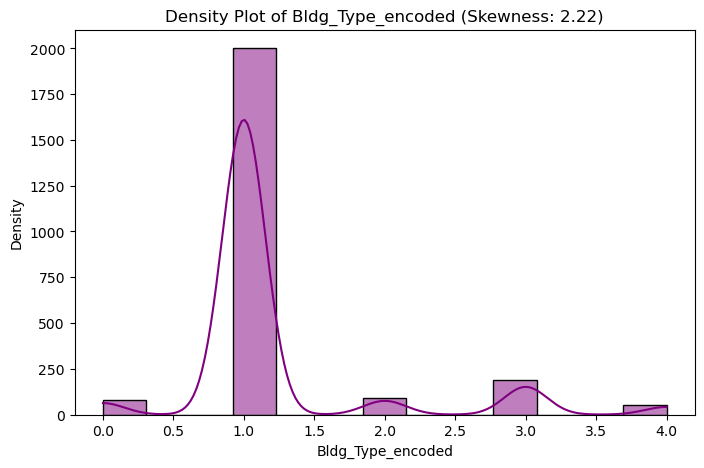

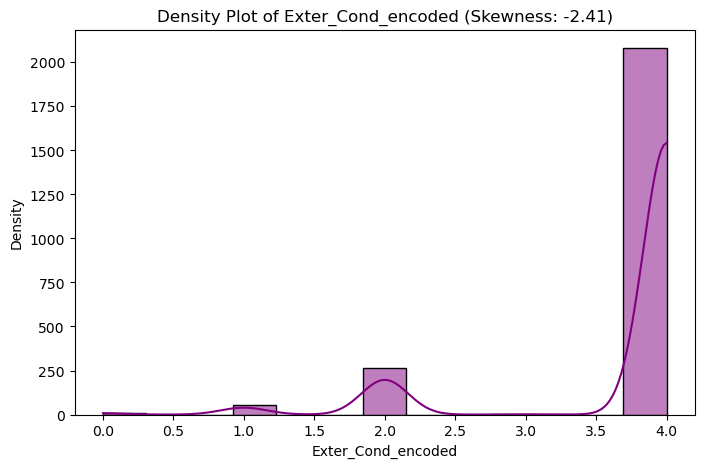

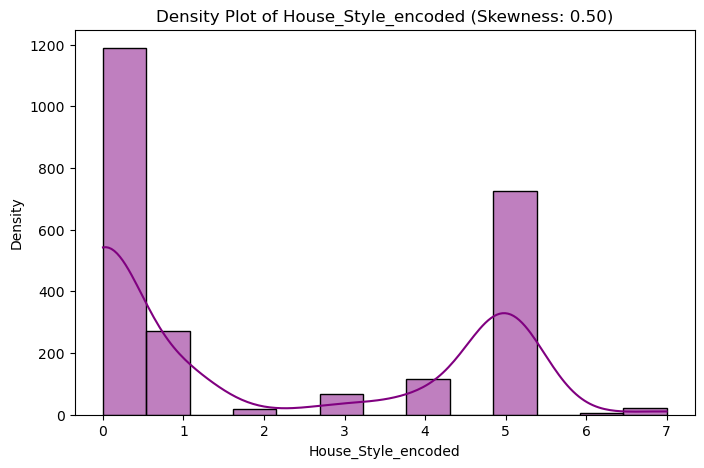

In [22]:
# Plotting density plots for numerical columns before transformation with skewness info
columnstoplot = data.columns.tolist()
for col in columnstoplot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, color='purple')
    plt.title(f'Density Plot of {col} (Skewness: {skewness[col]:.2f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

Using transformation

In [23]:
# Log transforming only features which has extreme sknewness values, others we will look into them while we check outliers 
features_to_transform = ['Lot_Area', 'First_Flr_SF', 'Kitchen_AbvGr', 'Sale_Price', 'Overall_Cond_encoded', 'Bldg_Type_encoded' ]  

# Applying log transformation to selected features
data[features_to_transform] = data[features_to_transform].apply(lambda x: np.log1p(x)) # here np.log1p has been used to avoid issues with zero or negative values in the data


In [24]:
skewness_after_transformation = data[features_to_transform].apply(lambda x: x.skew()).sort_values(ascending=False)

# Display the skewness values after transformation
print(skewness_after_transformation)

Kitchen_AbvGr           4.261726
Bldg_Type_encoded       0.985095
Overall_Cond_encoded    0.542142
Sale_Price              0.155859
First_Flr_SF            0.024600
Lot_Area               -0.513180
dtype: float64


In [25]:
data

Lot_Frontage   Lot_Area  Year_Built  Total_Bsmt_SF  First_Flr_SF  \
0              141  10.366309        1960           1080      7.412764   
1               80   9.360741        1961            882      6.799056   
2               81   9.565775        1958           1329      7.192934   
3               93   9.320181        1968           2110      7.654917   
4               74   9.534668        1997            928      6.834109   
...            ...        ...         ...            ...           ...   
2408            37   8.979417        1984           1003      6.911747   
2409             0   9.092232        1983            864      6.805723   
2410            62   9.253591        1992            912      6.878326   
2411            77   9.211440        1974           1389      7.237059   
2412            74   9.172431        1993            996      6.904751   

      Second_Flr_SF  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0                 0          1          0              3       0.693147   
1                 0          1          0              2       0.693147   
2                 0          1          1              3       0.693147   
3                 0          2          1              3       0.693147   
4               701          2          1              3       0.693147   
...             ...        ...        ...            ...            ...   
2408              0          1          0              3       0.693147   
2409              0          1          0              2       0.693147   
2410              0          1          0              3       0.693147   
2411              0          1          0              2       0.693147   
2412           1004          2          1              3       0.693147   

      Fireplaces  Longitude   Latitude  Sale_Price  Overall_Cond_encoded  \
0              2 -93.619754  42.054035   12.278398              0.693147   
1              0 -93.619756  42.053014   11.561725              0.000000   
2              0 -93.619387  42.052659   12.055256              0.000000   
3              2 -93.617320  42.051245   12.404928              0.693147   
4              1 -93.638933  42.060899   12.154258              0.693147   
...          ...        ...        ...         ...                   ...   
2408           0 -93.604776  41.988964   11.867104              0.000000   
2409           0 -93.602680  41.988314   11.782960              0.693147   
2410           0 -93.606847  41.986510   11.790565              0.693147   
2411           1 -93.600190  41.990921   12.043560              0.693147   
2412           1 -93.599996  41.989265   12.144203              0.693147   

      Bldg_Type_encoded  Exter_Cond_encoded  House_Style_encoded  
0              0.693147                   4                    0  
1              0.693147                   4                    0  
2              0.693147                   4                    0  
3              0.693147                   4                    0  
4              0.693147                   4                    5  
...                 ...                 ...                  ...  
2408           0.693147                   4                    4  
2409           0.693147                   4                    0  
2410           0.693147                   4                    3  
2411           0.693147                   4                    0  
2412           0.693147                   4                    5  

[2413 rows x 18 columns]

In [26]:
#applying Box-cox transformation for feature with negative skewness value 
transformed_feature, lambda_value = boxcox(data['Exter_Cond_encoded'] + abs(data['Exter_Cond_encoded'].min()) + 1)
# adding 1 to make sure that all values are positive before applying Box-Cox

# here 'transformed_feature' has the transformed values

# Checking the lambda value to retain for any inverse transformation
print(f"Lambda value for Box-Cox transformation: {lambda_value}") # 'lambda_value' holds the lambda used in the transformation


# Replacing the feature column in my dataframe with the transformed values
data['transformed_feature'] = transformed_feature

Lambda value for Box-Cox transformation: 11.755927471422144


In [27]:
#computing Skewness and kurtosis of the features again to check after applying transformation
skewness = data.skew()
kurtosis = data.kurt()

stats_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
print(stats_df)

                      Skewness   Kurtosis
Lot_Frontage         -0.081114   1.165690
Lot_Area             -0.513180   3.793270
Year_Built           -0.586724  -0.438653
Total_Bsmt_SF         0.456386   1.716119
First_Flr_SF          0.024600   0.030996
Second_Flr_SF         0.804118  -0.559404
Full_Bath             0.245013  -0.570307
Half_Bath             0.663992  -1.162667
Bedroom_AbvGr         0.184159   1.471746
Kitchen_AbvGr         4.261726  21.846437
Fireplaces            0.739075   0.138247
Longitude            -0.337513  -0.972557
Latitude             -0.507778  -0.083129
Sale_Price            0.155859   0.675376
Overall_Cond_encoded  0.542142  -0.603059
Bldg_Type_encoded     0.985095   3.501112
Exter_Cond_encoded   -2.406885   4.640708
House_Style_encoded   0.498645  -1.568070
transformed_feature  -2.105647   2.436031


Checking Z Score for each Column

In [28]:
z_score = {}
for col in columnstoplot:
    mean = data[col].mean()
    std = data[col].std()
    z_score[col] = (data[col] - mean) / std

# getting the output in a dictionary where each pair represents a feature and its Z-score
for col, scores in z_score.items():
    print(f"Z-score for {col}: {scores}")

Z-score for Lot_Frontage: 0       2.550130
1       0.731537
2       0.761350
3       1.119106
4       0.552659
          ...   
2408   -0.550422
2409   -1.653503
2410    0.194903
2411    0.642098
2412    0.552659
Name: Lot_Frontage, Length: 2413, dtype: float64
Z-score for Lot_Area: 0       2.490362
1       0.543351
2       0.940343
3       0.464817
4       0.880113
          ...   
2408   -0.194981
2409    0.023457
2410    0.335885
2411    0.254270
2412    0.178739
Name: Lot_Area, Length: 2413, dtype: float64
Z-score for Year_Built: 0      -0.320008
1      -0.286096
2      -0.387833
3      -0.048711
4       0.934742
          ...   
2408    0.493884
2409    0.459972
2410    0.765181
2411    0.154762
2412    0.799093
Name: Year_Built, Length: 2413, dtype: float64
Z-score for Total_Bsmt_SF: 0       0.139793
1      -0.344340
2       0.748628
3       2.658267
4      -0.231865
          ...   
2408   -0.048481
2409   -0.388353
2410   -0.270987
2411    0.895336
2412   -0.065597
Name: Total_

Handling of outliers

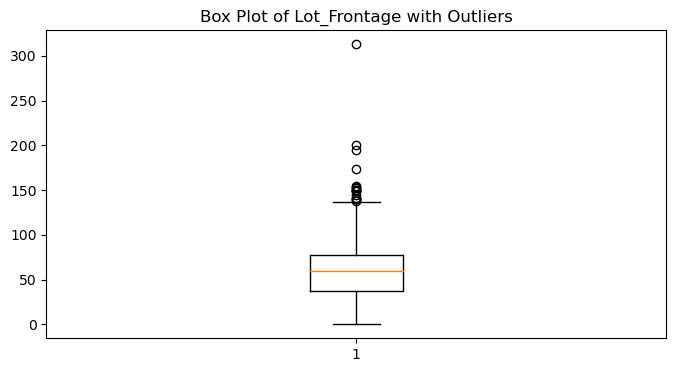

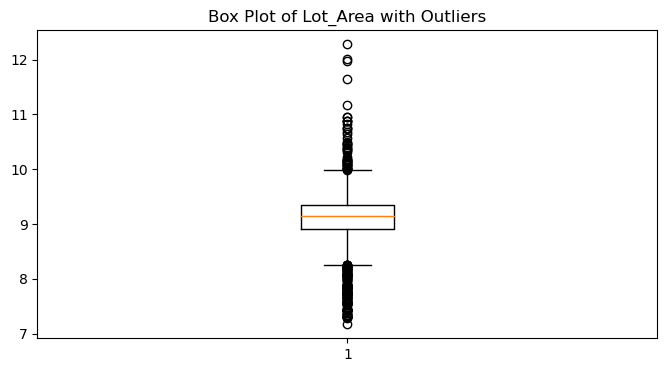

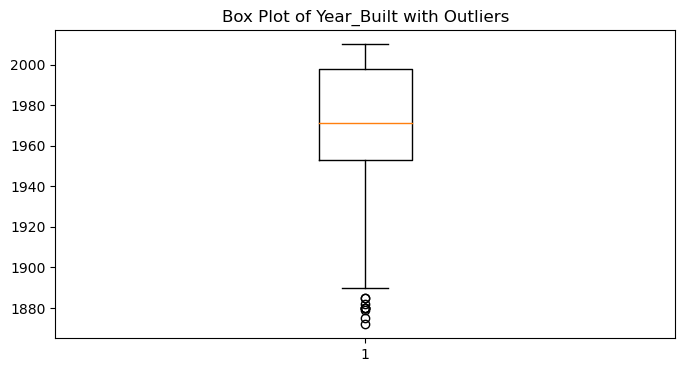

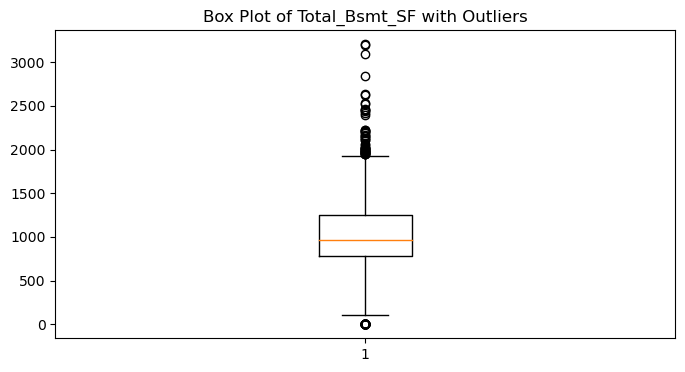

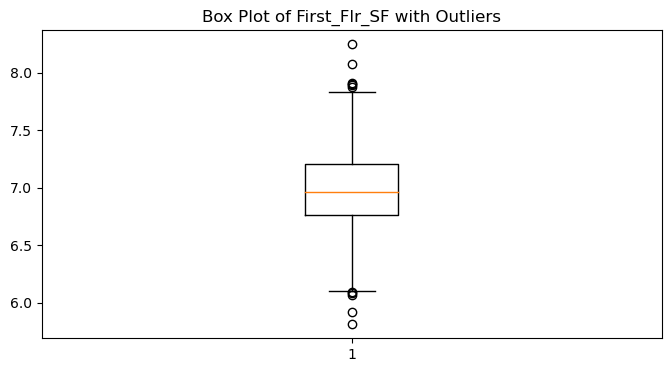

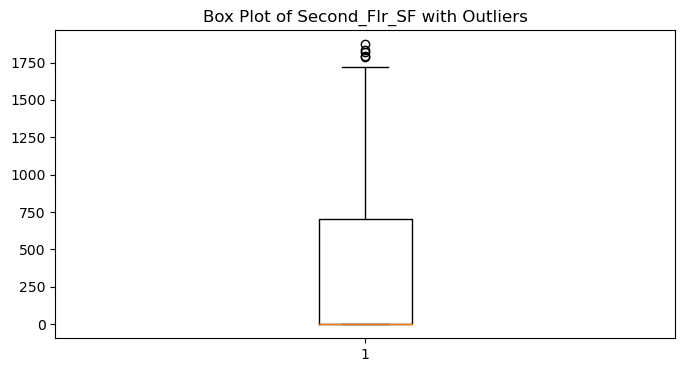

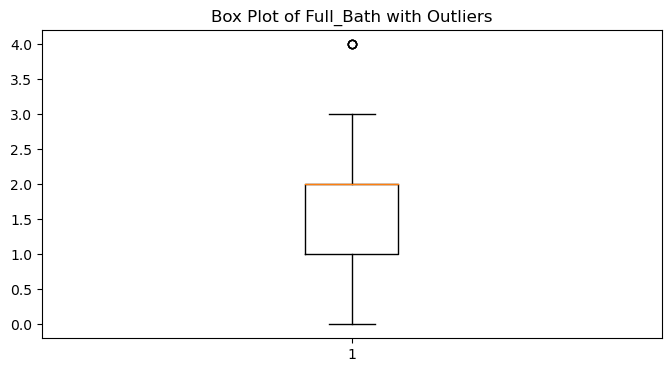

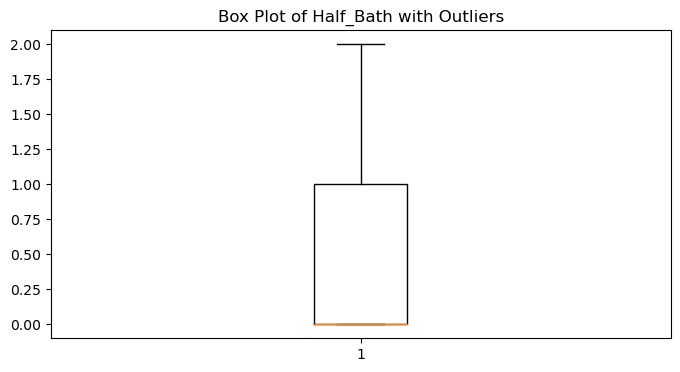

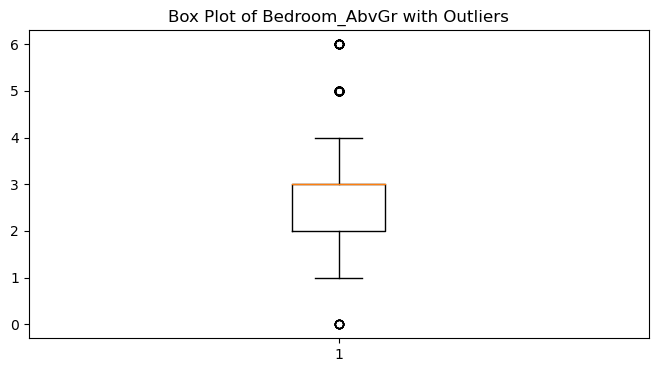

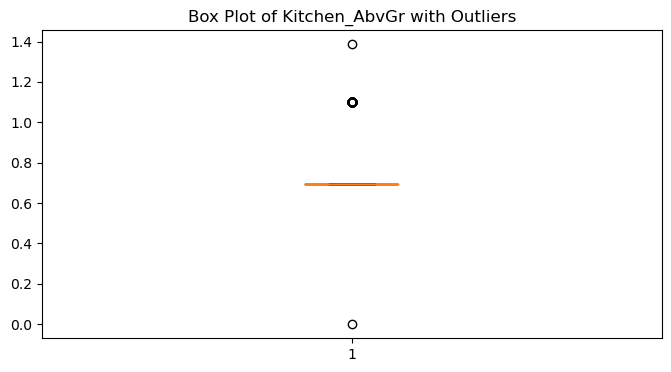

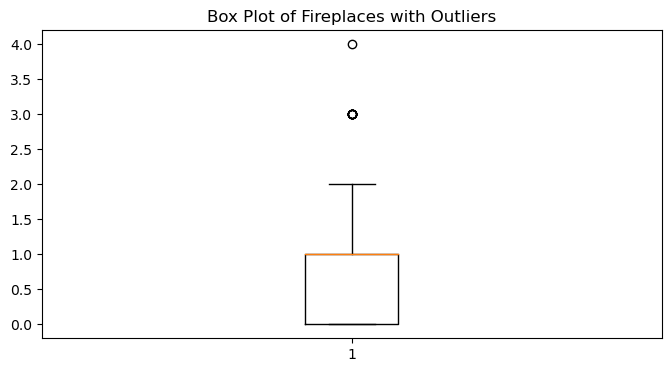

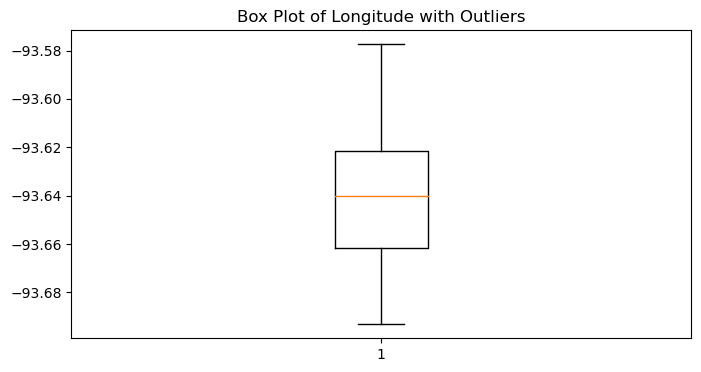

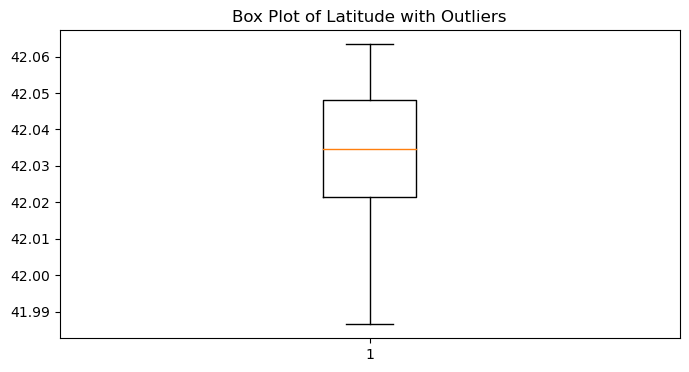

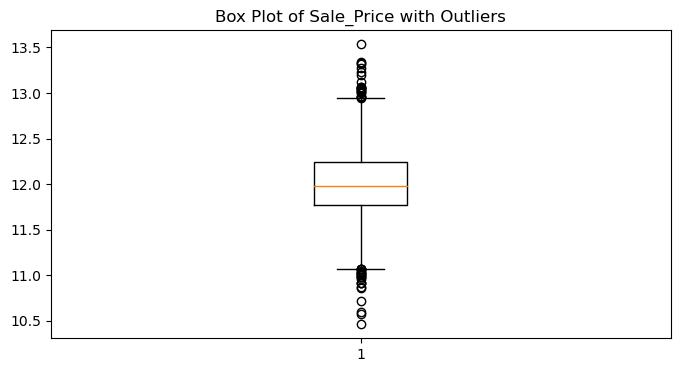

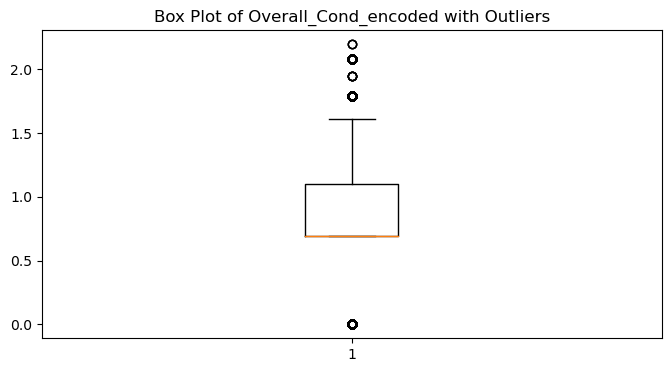

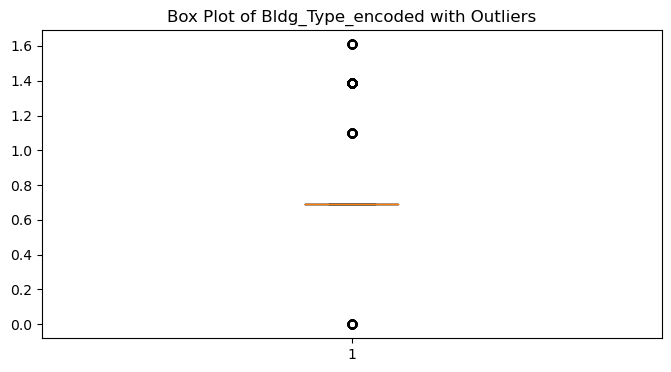

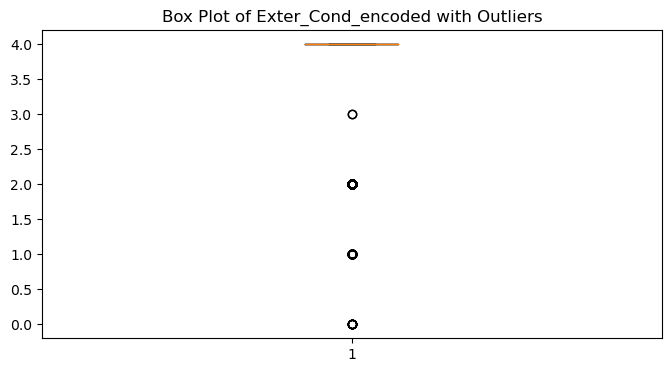

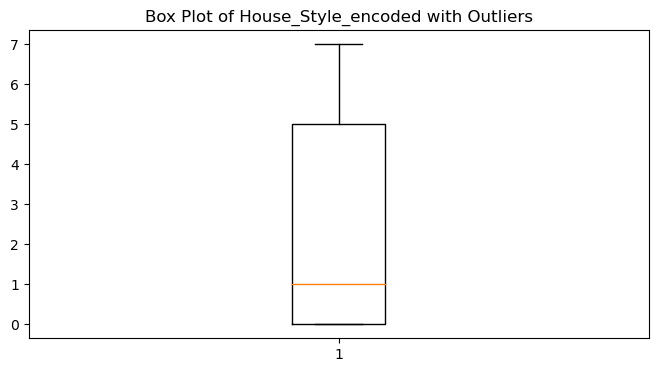

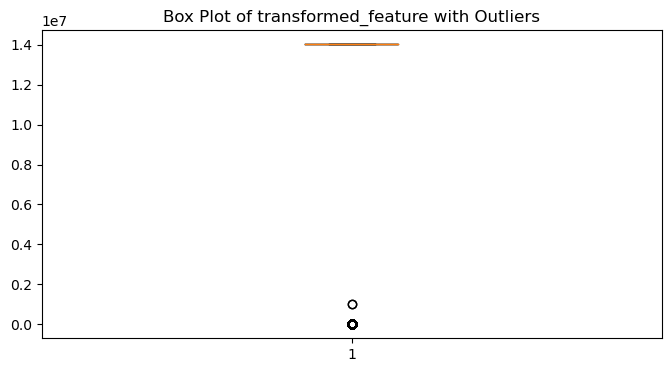

In [29]:
# Creating boxplots to identify outliers
int_cols = data.select_dtypes(include=['int64', 'float64', 'int32']).columns

for column in int_cols:
    plt.figure(figsize=(8, 4))
    
    # Creating a boxplot
    plt.boxplot(data[column])
    
    # Identifying and plotting outliers as blue dots
    outliers = data[(data[column] > plt.ylim()[1]) | (data[column] < plt.ylim()[0])]
    plt.scatter(outliers.index, outliers[column], c='blue', label='Outliers', alpha=0.6)
    
    plt.title(f'Box Plot of {column} with Outliers')
    plt.show()

In [30]:
#to calculate how many outliers each feature has 
for column in int_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # to identify outliers in the column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # to display the number of outliers in each column
    print(f'{column}, Outliers: {len(outliers)}')


Lot_Frontage, Outliers: 16
Lot_Area, Outliers: 223
Year_Built, Outliers: 10
Total_Bsmt_SF, Outliers: 116
First_Flr_SF, Outliers: 11
Second_Flr_SF, Outliers: 5
Full_Bath, Outliers: 4
Half_Bath, Outliers: 0
Bedroom_AbvGr, Outliers: 61
Kitchen_AbvGr, Outliers: 98
Fireplaces, Outliers: 11
Longitude, Outliers: 0
Latitude, Outliers: 0
Sale_Price, Outliers: 46
Overall_Cond_encoded, Outliers: 974
Bldg_Type_encoded, Outliers: 411
Exter_Cond_encoded, Outliers: 332
House_Style_encoded, Outliers: 0
transformed_feature, Outliers: 332


Treating with outliers 

In [31]:

for column in int_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and treat outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [32]:
# shape of data after removing outliers
data.shape

(897, 19)

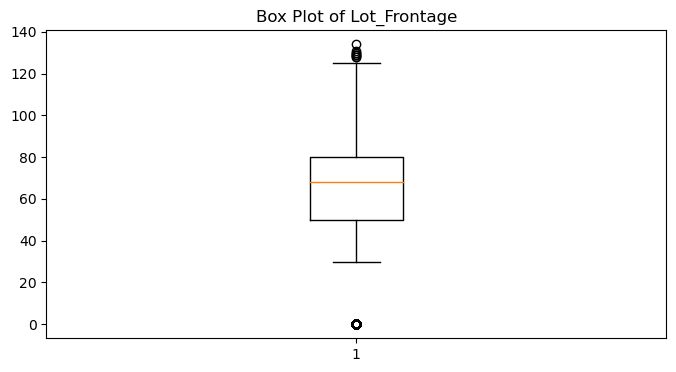

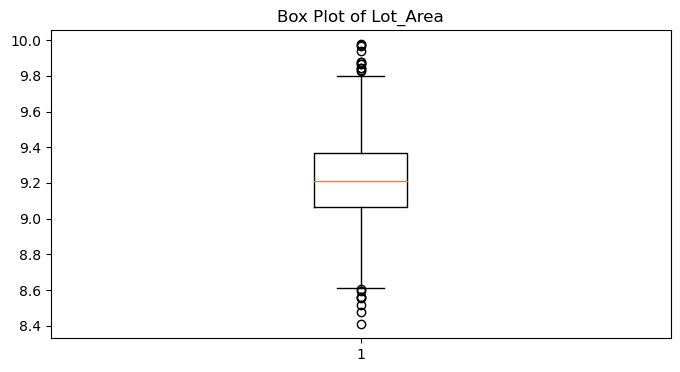

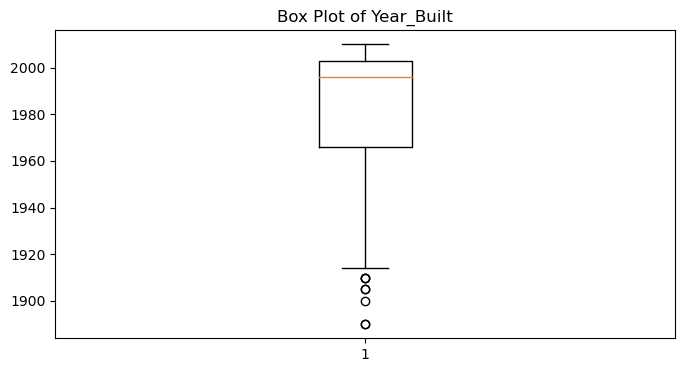

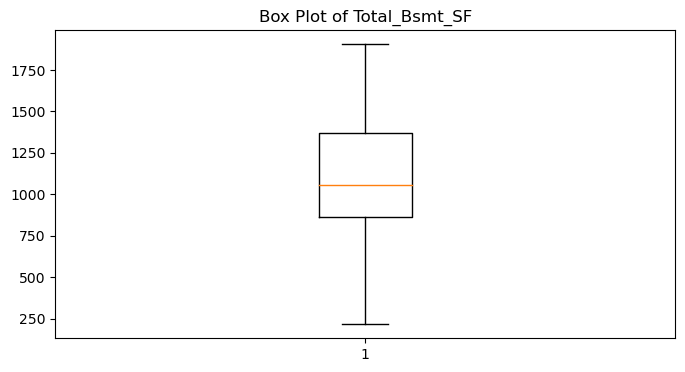

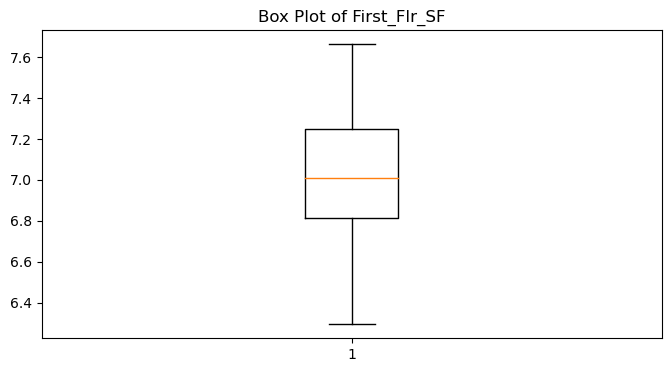

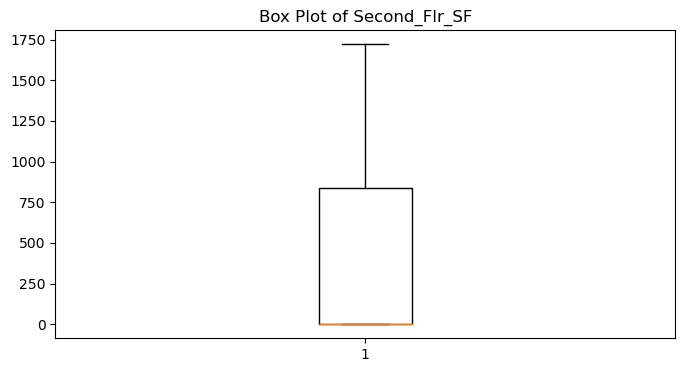

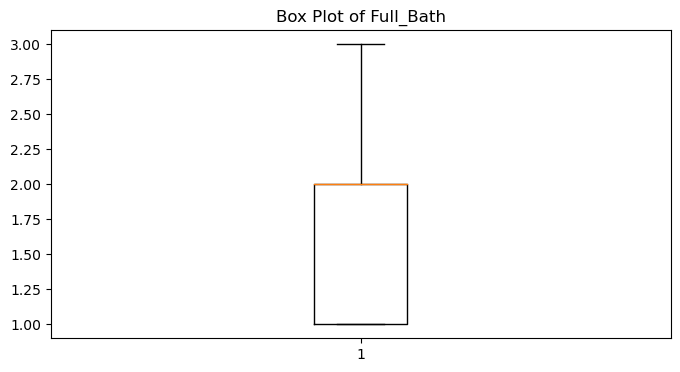

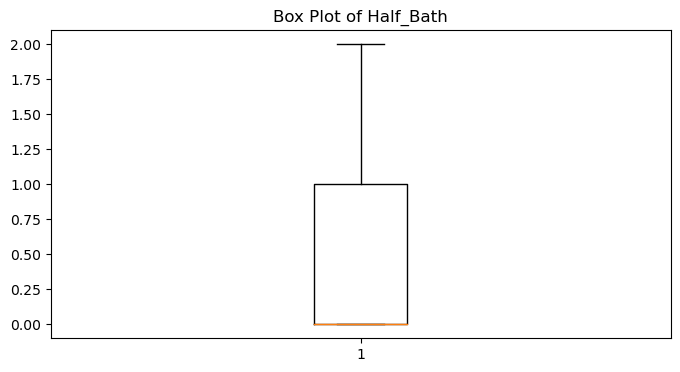

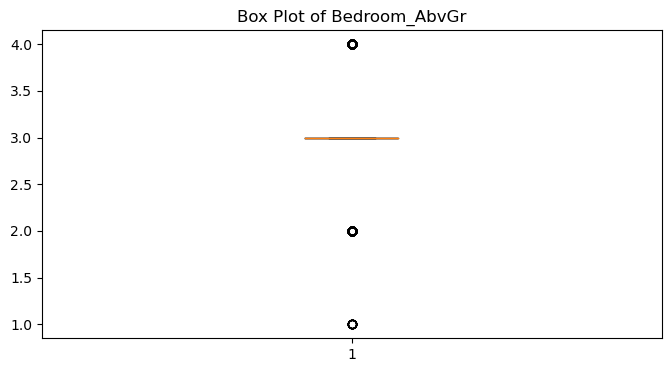

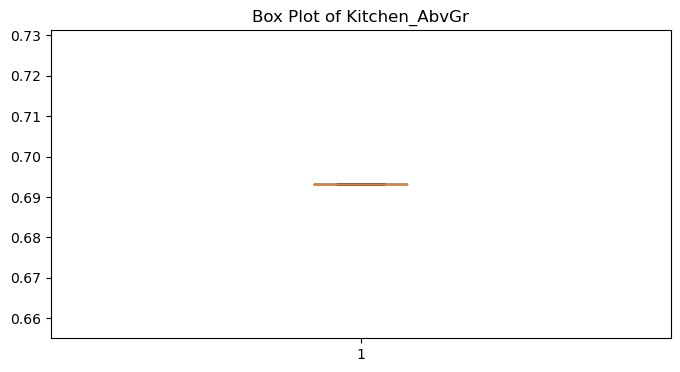

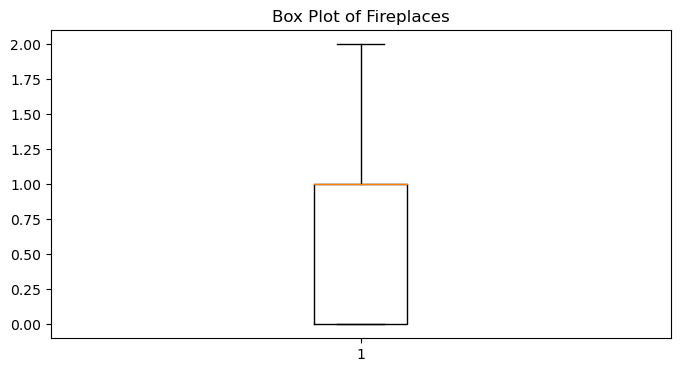

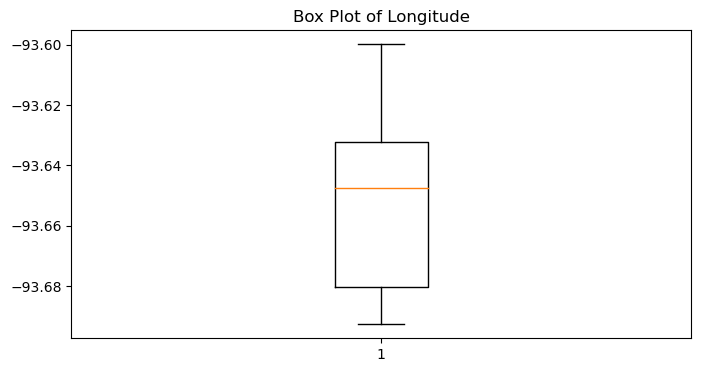

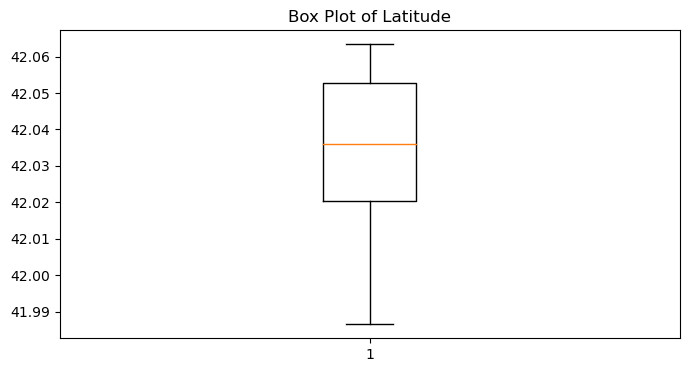

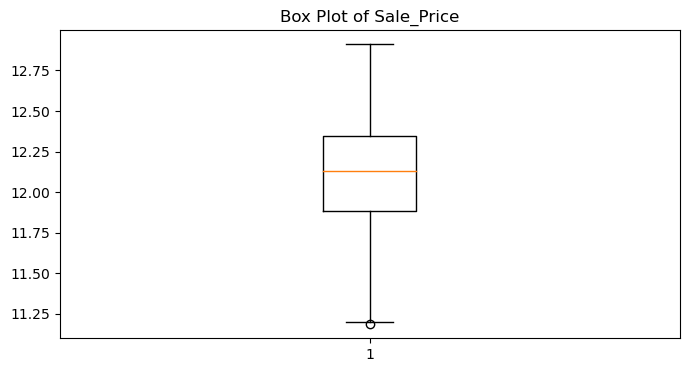

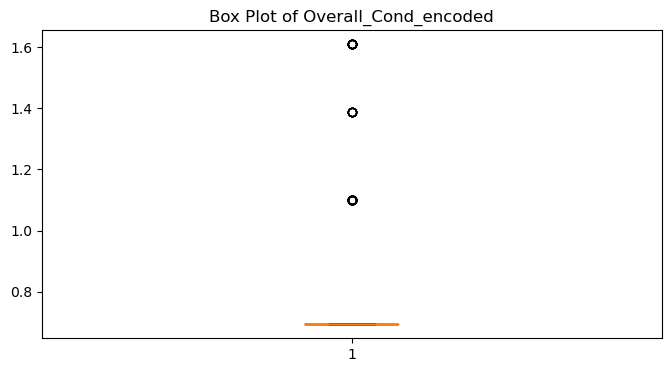

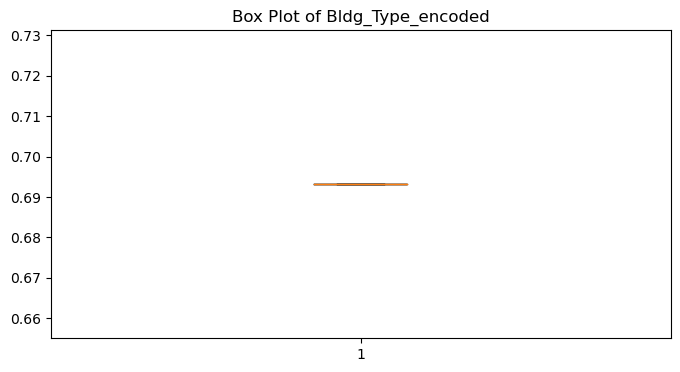

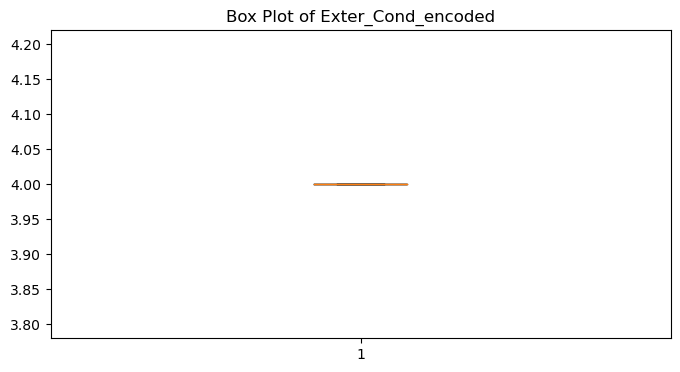

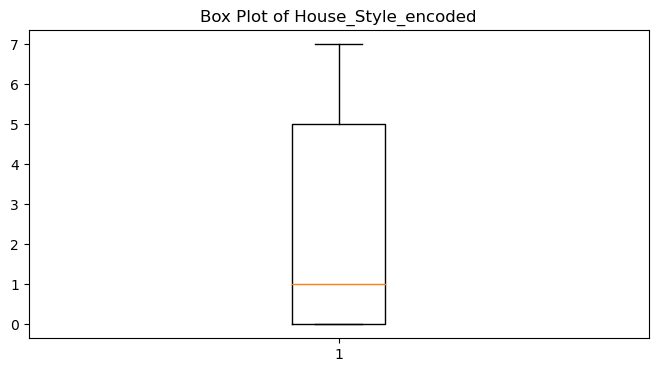

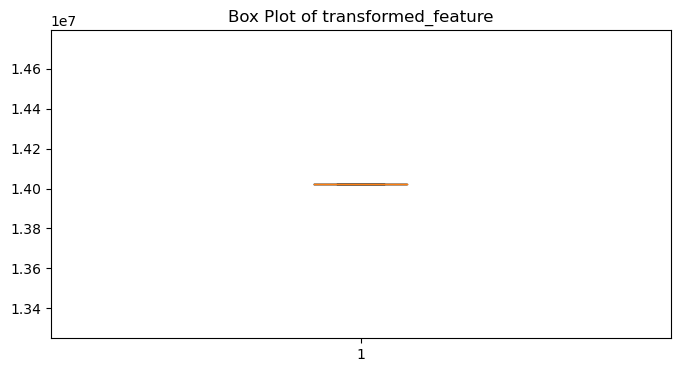

In [33]:
# creating boxplots after removing outliers
for column in int_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [34]:
data = data.drop(columns='Kitchen_AbvGr')

Checking collinearity

In [35]:
data_with_const = add_constant(data)  

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

C:\Users\BAJWA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide



In [36]:
print(vif_data)

                Variable       VIF
0           Lot_Frontage  1.057380
1               Lot_Area  1.260352
2             Year_Built  4.651591
3          Total_Bsmt_SF  7.223903
4           First_Flr_SF  7.747448
5          Second_Flr_SF  9.185824
6              Full_Bath  3.179241
7              Half_Bath  3.539582
8          Bedroom_AbvGr  1.691223
9             Fireplaces  1.492917
10             Longitude  1.428484
11              Latitude  1.215659
12            Sale_Price  9.318871
13  Overall_Cond_encoded  1.195664
14     Bldg_Type_encoded  0.000000
15    Exter_Cond_encoded  0.000000
16   House_Style_encoded  5.703537
17   transformed_feature  0.000000


Dropping high VIF values

In [37]:
data = data.drop(columns='Second_Flr_SF')
data = data.drop(columns='First_Flr_SF')

Again checking collinearity

In [38]:
data_with_const = add_constant(data)  

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_with_const.columns  # Use 'data_with_const.columns' to ensure consistency
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]


C:\Users\BAJWA\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide



In [39]:
print(vif_data)

                Variable       VIF
0           Lot_Frontage  1.056244
1               Lot_Area  1.240725
2             Year_Built  3.588975
3          Total_Bsmt_SF  4.172141
4              Full_Bath  2.907442
5              Half_Bath  2.897920
6          Bedroom_AbvGr  1.370620
7             Fireplaces  1.433952
8              Longitude  1.424578
9               Latitude  1.205898
10            Sale_Price  6.874174
11  Overall_Cond_encoded  1.189372
12     Bldg_Type_encoded  0.000000
13    Exter_Cond_encoded  0.000000
14   House_Style_encoded  4.553389
15   transformed_feature  0.000000


Correlation matrix

<Axes: >

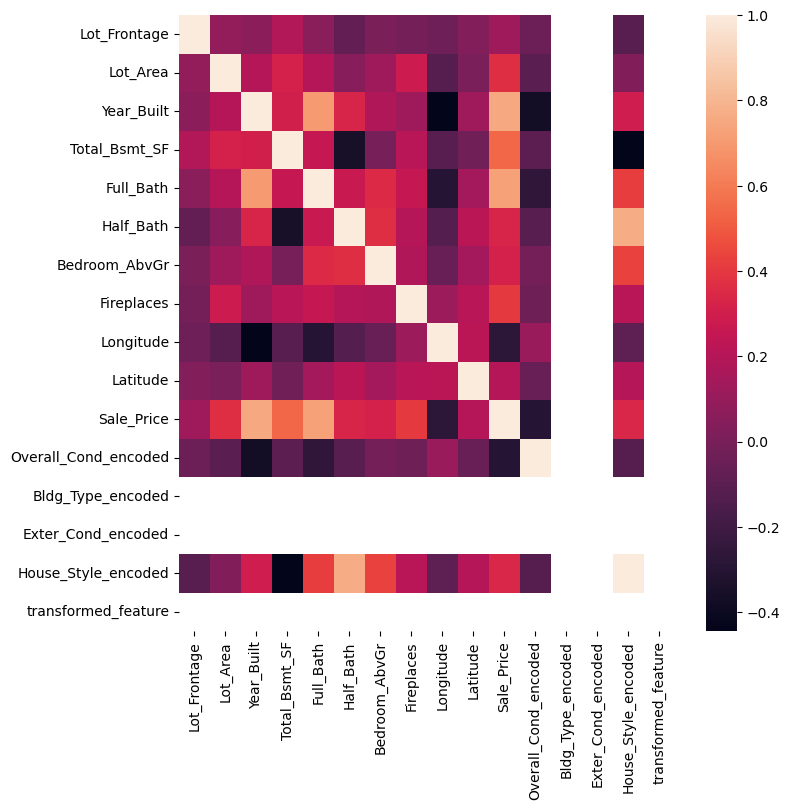

In [40]:
corr = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr)

Most and Least correlation with Sale_price

In [41]:
print (corr['Sale_Price'].sort_values(ascending=False)[:10]) #top 10 correlations
print (corr['Sale_Price'].sort_values(ascending=False)[-5:]) #leas`t 5 correlations

Sale_Price             1.000000
Year_Built             0.749195
Full_Bath              0.724404
Total_Bsmt_SF          0.538065
Fireplaces             0.406205
Lot_Area               0.365990
House_Style_encoded    0.338516
Half_Bath              0.332793
Bedroom_AbvGr          0.313631
Latitude               0.194252
Name: Sale_Price, dtype: float64
Longitude              -0.273940
Overall_Cond_encoded   -0.299972
Bldg_Type_encoded            NaN
Exter_Cond_encoded           NaN
transformed_feature          NaN
Name: Sale_Price, dtype: float64


**Modelling**

In [42]:
#splitting the data into X and Y dataframes 

train_y = data.Sale_Price

# based on the correlation matrix, we choose the following features as predictor variables
predictor_parameters = [ 'Year_Built','Full_Bath', 'Total_Bsmt_SF', 'Fireplaces' ]

train_X = data[predictor_parameters]


In [43]:
X = train_X
Y = train_y

Partitioning of dataset in train and test validation sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.33, random_state = 23138688)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (600, 4)
X_test : (297, 4)
y_train : (600,)
y_test : (297,)


Checking Analysis of Variance 

In [45]:
for column in X.columns:
    f_statistic, p_value = f_oneway(X[column], Y)
    print(f"Feature: {column}, F-Statistic: {f_statistic}, p-value: {p_value}")

Feature: Year_Built, F-Statistic: 5803326.458295206, p-value: 0.0
Feature: Full_Bath, F-Statistic: 288140.60993254377, p-value: 0.0
Feature: Total_Bsmt_SF, F-Statistic: 9819.368716716332, p-value: 0.0
Feature: Fireplaces, F-Statistic: 264256.21363024315, p-value: 0.0


Calculating Critical value to compare it with p-value

In [46]:
n = len(data)

dfn = 4 

dfd = n - 4 

alpha = 0.05 

# Calculate critical value
critical_value = f.ppf(1 - alpha, dfn, dfd)
print("Critical Value:", critical_value)

Critical Value: 2.3818997423603165


Doing Principal Component Analysis

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and also preserving the original column names
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Getting the principal components with original column names
principal_components = pd.DataFrame(X_pca, columns=[f"PC_{col}" for col in X.columns[:3]])

# Assess the variance explained by components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")


Explained variance ratio: [0.49847314 0.23618105 0.19547792]


Again Partition the dataset in train and test validation sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y,test_size = 0.33, random_state = 23138688)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (600, 3)
X_test : (297, 3)
y_train : (600,)
y_test : (297,)


In [49]:
principal_components

PC_Year_Built  PC_Full_Bath  PC_Total_Bsmt_SF
0        -0.688721     -0.108374         -0.936544
1        -0.818594     -0.070899         -0.773649
2        -0.388378     -0.218637         -1.345757
3        -0.542061     -0.273688         -1.289900
4         0.298906      0.953369          0.554108
..             ...           ...               ...
892      -0.445513      0.434994         -0.396539
893       1.561946     -0.775815          0.292475
894       1.283840     -0.873624          0.396050
895       0.578849      1.313800          0.810675
896      -0.675018      0.030690         -0.756750

[897 rows x 3 columns]

Performing linear regression

In [50]:
# Add constant to the features matrix for the intercept term
X_train_new = sm.add_constant(X_train)
X_test_new = sm.add_constant(X_test)

# Fit OLS model using training data
model = sm.OLS(y_train, X_train_new).fit()


print("Coefficients:")
print(model.params)

print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

print("Residuals:")
print(model.resid)

print("F-statistic:", model.fvalue)
print("p-value:", model.f_pvalue)

# Predict on test set
y_pred_new = model.predict(X_test_new)



Coefficients:
const    12.115230
x1       -0.208344
x2       -0.000271
x3        0.013965
dtype: float64
R-squared: 0.7864297336854313
Adjusted R-squared: 0.7853547155663982
Residuals:
739     0.068015
1406   -0.247348
734    -0.022121
124     0.066186
733     0.042089
          ...   
4      -0.091412
274     0.241088
1327    0.263113
905    -0.013580
2037    0.279239
Length: 600, dtype: float64
F-statistic: 731.5502127469198
p-value: 2.7624303102402757e-199


**Checking model meets the Gauss-Markov assumptions**

In [51]:
residual = model.resid
residuals = y_test - y_pred_new

Linearity 

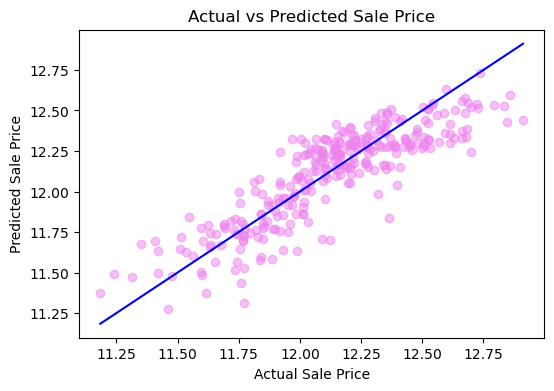

In [52]:
# Scatter plot to check linearity 
# 'y_test' contains the actual sale prices and 'y_pred_new' contains the predicted sale prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_new, alpha=0.5, color='violet')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='-')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

In [53]:
# Statistical(RESET Test) test to check linearity RESET Test
reset_test = linear_reset(model)
print(reset_test)

<Wald test (chi2): statistic=7.138328594218109, p-value=0.028179393443371784, df_denom=2>


C:\Users\BAJWA\anaconda3\Lib\site-packages\statsmodels\stats\diagnostic.py:1065: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Normality of Residuals

<Figure size 800x600 with 0 Axes>

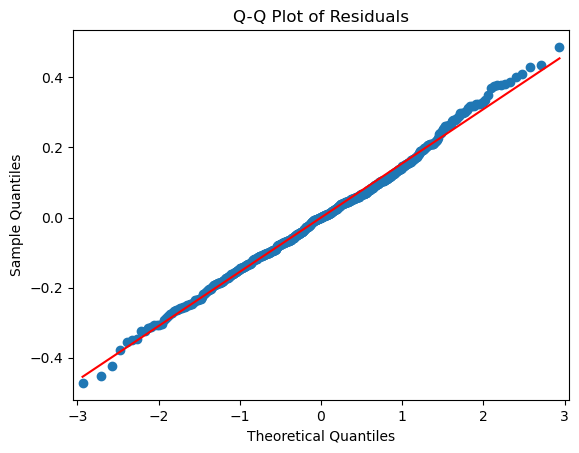

In [54]:
# Create a Q-Q plot to check normality of Residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residual, line='r')
#sm.qqplot(residual, line='r', dist=stats.norm, fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [55]:
# Statistical test to check normality of Residuals
s_test = shapiro(residual)
print(s_test)

ShapiroResult(statistic=0.9956386089324951, pvalue=0.09212029725313187)


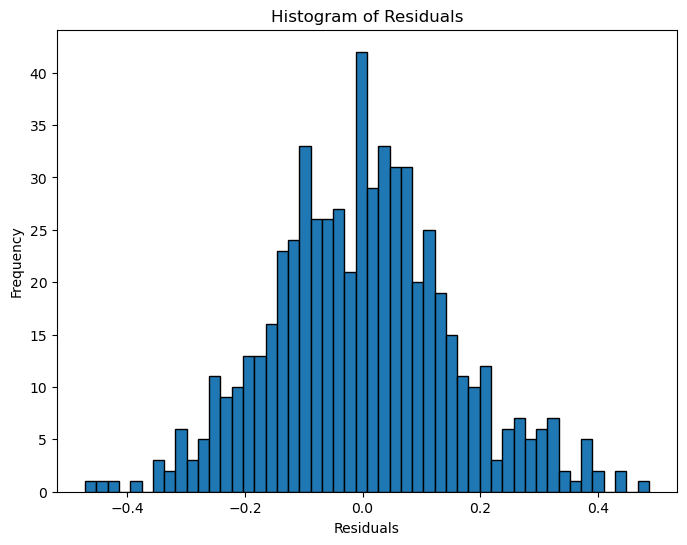

In [56]:
# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residual, bins=50, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Homoscedasticity of Residuals

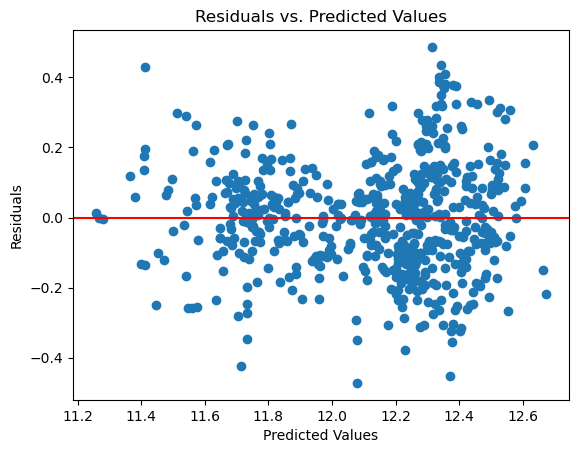

In [57]:
# check for homoscedasticity
residual = model.resid

predicted_values = model.fittedvalues

# Plotting residuals against predicted values
# plt.scatter(y_pred_new, residuals)
plt.scatter(predicted_values, residual)

plt.axhline(y=0, color='r', linestyle='-')  # Adding a horizontal line at 0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [58]:
residual = model.resid

# Assuming 'model' is the fitted regression model and 'residuals' are already computed
test_results = het_breuschpagan(residual, model.model.exog)
print("Breusch-Pagan Test Results:")
print(f"LM Statistic: {test_results[0]}")
print(f"P-value: {test_results[1]}")

Breusch-Pagan Test Results:
LM Statistic: 31.443755085336413
P-value: 6.854704042545716e-07


Independence of Residuals

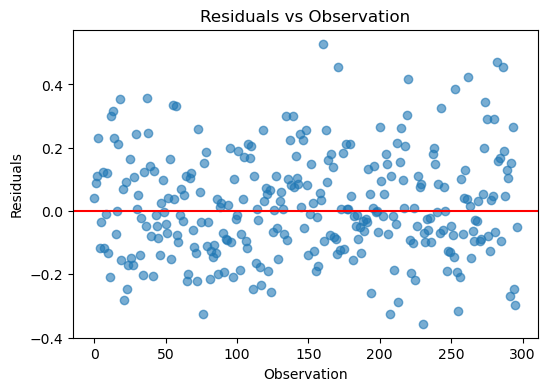

In [59]:
# Assuming 'residuals' is the array or DataFrame of residuals from your model
# Replace this with your actual residuals

# Create a DataFrame to store residuals and their index/order of observation
residuals_df = pd.DataFrame({'Residuals': residuals})

# Add a column for the order of observation (assuming it's in chronological order)
residuals_df['Observation_Order'] = range(len(residuals_df))

# Plot residuals against the order of observation
plt.figure(figsize=(6, 4))
plt.scatter(residuals_df['Observation_Order'], residuals_df['Residuals'], alpha=0.6)
plt.axhline(y=0, color='red', linestyle='-')  # Add a horizontal line at 0 for reference
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.title('Residuals vs Observation')
plt.show()